In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
train = pd.read_csv(r"C:\Users\MAHESH\OneDrive\Desktop\Internship AIML\airlines\train.csv")
test = pd.read_csv(r"C:\Users\MAHESH\OneDrive\Desktop\Internship AIML\airlines\test.csv")


In [4]:
train_BK = train.copy()
test_BK = test.copy()

In [4]:
train.tail()

Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
103899      103899  94171  Female  disloyal Customer   23  Business travel   
103900      103900  73097    Male     Loyal Customer   49  Business travel   
103901      103901  68825    Male  disloyal Customer   30  Business travel   
103902      103902  54173  Female  disloyal Customer   22  Business travel   
103903      103903  62567    Male     Loyal Customer   27  Business travel   

           Class  Flight Distance  Inflight wifi service  \
103899       Eco              192                      2   
103900  Business             2347                      4   
103901  Business             1995                      1   
103902       Eco             1000                      1   
103903  Business             1723                      1   

        Departure/Arrival time convenient  Ease of Online booking  \
103899                                  1                       2   
103900                                  4                       4   
103901                                  1                       1   
103902                                  1                       1   
103903                                  3                       3   

        Gate location  Food and drink  Online boarding  Seat comfort  \
103899              3               2                2             2   
103900              4               2                4             5   
103901              3               4                1             5   
103902              5               1                1             1   
103903              3               1                1             1   

        Inflight entertainment  On-board service  Leg room service  \
103899                       2                 3                 1   
103900                       5                 5                 5   
103901                       4                 3                 2   
103902                       1                 4                 5   
103903                       1                 1                 1   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
103899                 4                2                 3            2   
103900                 5                5                 5            4   
103901                 4                5                 5            4   
103902                 1                5                 4            1   
103903                 4                4                 3            1   

        Departure Delay in Minutes  Arrival Delay in Minutes  \
103899                           3                       0.0   
103900                           0                       0.0   
103901                           7                      14.0   
103902                           0                       0.0   
103903                           0                       0.0   

                   satisfaction  
103899  neutral or dissatisfied  
103900                satisfied  
103901  neutral or dissatisfied  
103902  neutral or dissatisfied  
103903  neutral or dissatisfied

In [5]:
test.tail()

Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
25971       25971  78463    Male  disloyal Customer   34  Business travel   
25972       25972  71167    Male     Loyal Customer   23  Business travel   
25973       25973  37675  Female     Loyal Customer   17  Personal Travel   
25974       25974  90086    Male     Loyal Customer   14  Business travel   
25975       25975  34799  Female     Loyal Customer   42  Personal Travel   

          Class  Flight Distance  Inflight wifi service  \
25971  Business              526                      3   
25972  Business              646                      4   
25973       Eco              828                      2   
25974  Business             1127                      3   
25975       Eco              264                      2   

       Departure/Arrival time convenient  Ease of Online booking  \
25971                                  3                       3   
25972                                  4                       4   
25973                                  5                       1   
25974                                  3                       3   
25975                                  5                       2   

       Gate location  Food and drink  Online boarding  Seat comfort  \
25971              1               4                3             4   
25972              4               4                4             4   
25973              5               2                1             2   
25974              3               4                4             4   
25975              5               4                2             2   

       Inflight entertainment  On-board service  Leg room service  \
25971                       4                 3                 2   
25972                       4                 4                 5   
25973                       2                 4                 3   
25974                       4                 3                 2   
25975                       1                 1                 2   

       Baggage handling  Checkin service  Inflight service  Cleanliness  \
25971                 4                4                 5            4   
25972                 5                5                 5            4   
25973                 4                5                 4            2   
25974                 5                4                 5            4   
25975                 1                1                 1            1   

       Departure Delay in Minutes  Arrival Delay in Minutes  \
25971                           0                       0.0   
25972                           0                       0.0   
25973                           0                       0.0   
25974                           0                       0.0   
25975                           0                       0.0   

                  satisfaction  
25971  neutral or dissatisfied  
25972                satisfied  
25973  neutral or dissatisfied  
25974                satisfied  
25975  neutral or dissatisfied

In [6]:
train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

# Checking for duplicates

In [7]:
# Displaying Duplicate values with in dataset training

train_dup = train[train.duplicated(keep='last')]
train_dup

Empty DataFrame
Columns: [Unnamed: 0, id, Gender, Customer Type, Age, Type of Travel, Class, Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, Departure Delay in Minutes, Arrival Delay in Minutes, satisfaction]
Index: []

In [8]:
train.shape

(103904, 25)

In [9]:
# Remove the identified duplicate records 

train = train.drop_duplicates()
train.shape
#Duplicate entries are problematic for multiple reasons. First off, when an entry appears more than once, it receives a disproportionate weight during training. Thus models that succeed on frequent entries will look like they perform well, while in reality this is not the case. Additionally, duplicate entries can ruin the split between train, validation and test sets in cases where identical entries are not all in the same set. This can lead to biased performance estimates that will lead to disappointing models in production.

(103904, 25)

In [10]:
# Displaying Duplicate values with in dataset test

test_dup = test[test.duplicated(keep='last')]
test_dup

Empty DataFrame
Columns: [Unnamed: 0, id, Gender, Customer Type, Age, Type of Travel, Class, Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, Departure Delay in Minutes, Arrival Delay in Minutes, satisfaction]
Index: []

In [11]:
train.describe()

Unnamed: 0             id            Age  Flight Distance  \
count  103904.000000  103904.000000  103904.000000    103904.000000   
mean    51951.500000   64924.210502      39.379706      1189.448375   
std     29994.645522   37463.812252      15.114964       997.147281   
min         0.000000       1.000000       7.000000        31.000000   
25%     25975.750000   32533.750000      27.000000       414.000000   
50%     51951.500000   64856.500000      40.000000       843.000000   
75%     77927.250000   97368.250000      51.000000      1743.000000   
max    103903.000000  129880.000000      85.000000      4983.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count          103904.000000                      103904.000000   
mean                2.729683                           3.060296   
std                 1.327829                           1.525075   
min                 0.000000                           0.000000   
25%                 2.000000                           2.000000   
50%                 3.000000                           3.000000   
75%                 4.000000                           4.000000   
max                 5.000000                           5.000000   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
count           103904.000000  103904.000000   103904.000000    103904.000000   
mean                 2.756901       2.976883        3.202129         3.250375   
std                  1.398929       1.277621        1.329533         1.349509   
min                  0.000000       0.000000        0.000000         0.000000   
25%                  2.000000       2.000000        2.000000         2.000000   
50%                  3.000000       3.000000        3.000000         3.000000   
75%                  4.000000       4.000000        4.000000         4.000000   
max                  5.000000       5.000000        5.000000         5.000000   

        Seat comfort  Inflight entertainment  On-board service  \
count  103904.000000           103904.000000     103904.000000   
mean        3.439396                3.358158          3.382363   
std         1.319088                1.332991          1.288354   
min         0.000000                0.000000          0.000000   
25%         2.000000                2.000000          2.000000   
50%         4.000000                4.000000          4.000000   
75%         5.000000                4.000000          4.000000   
max         5.000000                5.000000          5.000000   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
count     103904.000000     103904.000000    103904.000000     103904.000000   
mean           3.351055          3.631833         3.304290          3.640428   
std            1.315605          1.180903         1.265396          1.175663   
min            0.000000          1.000000         0.000000          0.000000   
25%            2.000000          3.000000         3.000000          3.000000   
50%            4.000000          4.000000         3.000000          4.000000   
75%            4.000000          5.000000         4.000000          5.000000   
max            5.000000          5.000000         5.000000          5.000000   

         Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  
count  103904.000000               103904.000000             103594.000000  
mean        3.286351                   14.815618                 15.178678  
std         1.312273                   38.230901                 38.698682  
min         0.000000                    0.000000                  0.000000  
25%         2.000000                    0.000000                  0.000000  
50%         3.000000                    0.000000                  0.000000  
75%         4.000000                   12.000000                 13.000000  
max         5.000000                 1592.000000               1584.000000

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [13]:

print("..........training data .............")
display(train.describe(include = ['object']))
print("..........testing data .............")
display(test.describe(include = ['object']))

..........training data .............


Gender   Customer Type   Type of Travel     Class  \
count   103904          103904           103904    103904   
unique       2               2                2         3   
top     Female  Loyal Customer  Business travel  Business   
freq     52727           84923            71655     49665   

                   satisfaction  
count                    103904  
unique                        2  
top     neutral or dissatisfied  
freq                      58879

..........testing data .............


Gender   Customer Type   Type of Travel     Class  \
count    25976           25976            25976     25976   
unique       2               2                2         3   
top     Female  Loyal Customer  Business travel  Business   
freq     13172           21177            18038     12495   

                   satisfaction  
count                     25976  
unique                        2  
top     neutral or dissatisfied  
freq                      14573

# Checking for balanced Data

In [14]:
satisfaction_counts = train.satisfaction.value_counts()
print("class 0:",satisfaction_counts[0])
print("class 1:",satisfaction_counts[1])

class 0: 58879
class 1: 45025


In [15]:

print('Proportion:', round(satisfaction_counts[0] / satisfaction_counts[1], 2), ': 1')   #proportion--- major/minor
print('Total Bank records:', len(train))

Proportion: 1.31 : 1
Total Bank records: 103904


In [16]:
#-----------Balanced Data -------------------

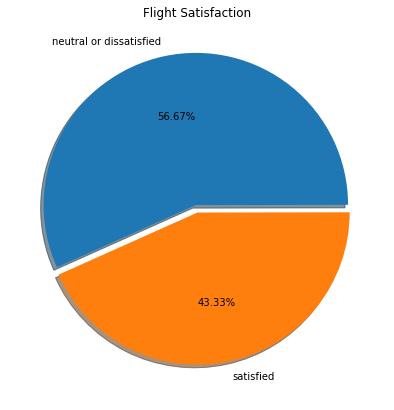

(45025, 25) (58879, 25)


In [17]:
def draw_pie_plot(column, title, **kvargs):
    explode = np.zeros(len(column.unique()))
    explode[:-1] = 0.05
    
    column.value_counts().plot(
        kind='pie',
        title=title, 
        ylabel="",  
        autopct='%1.2f%%', 
        explode=explode, 
        shadow=True,
        startangle=0.1,
        **kvargs
    )
draw_pie_plot(train['satisfaction'], "Flight Satisfaction", figsize=(7, 7))
plt.show()

satisfied = train[train['satisfaction'] == 'satisfied']
dissatisfied = train[train['satisfaction'] == 'neutral or dissatisfied']

print(satisfied.shape, dissatisfied.shape)

 from the pie chart, the selection is more or less balanced.

Let's calculate the correlation matrix for quantitative features and use the visual image of this matrix:

# Handling Missing Values

In [18]:
# KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform', metric='nan_euclidean', 
# copy=True, add_indicator=False)

from sklearn.impute import KNNImputer

imputer_knn =KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform', metric='nan_euclidean',  copy=True, add_indicator=False)


train['Arrival Delay in Minutes']=imputer_knn.fit_transform(train[['Arrival Delay in Minutes']])

# KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform', metric='nan_euclidean', 
# copy=True, add_indicator=False)

from sklearn.impute import KNNImputer

imputer_knn =KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform', metric='nan_euclidean',  copy=True, add_indicator=False)

test['Arrival Delay in Minutes']=imputer_knn.fit_transform(test[['Arrival Delay in Minutes']])

# Visualisation ...

<AxesSubplot:>

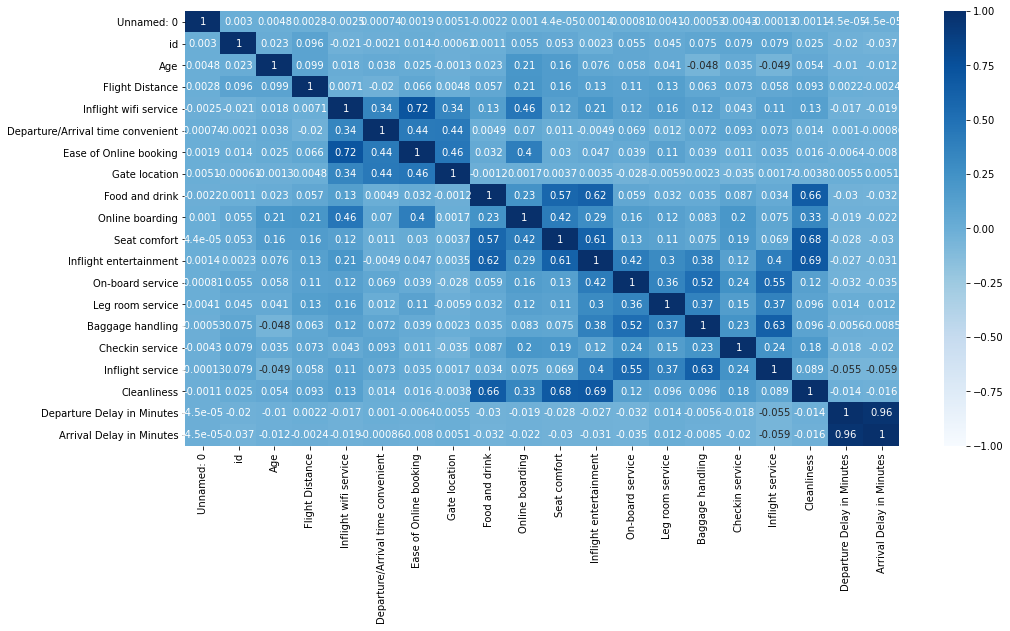

In [19]:

# Making a heatmap for the numeric data to understand how they correlate in pairs
plt.figure(figsize=(16,8))
sns.heatmap(train.corr(),annot=True,cmap="Blues", vmin=-1)


we  can see that there is a strong correlation between the features 'Departure delay in minutes' and 'Arrival delay in minutes'. The value of the correlation coefficient reaches the following value:
    

# studying each and every column

In [20]:
train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

# Gender

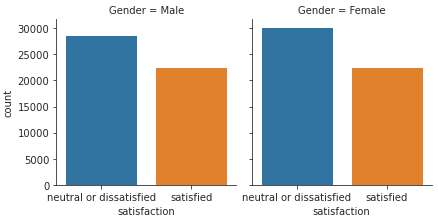

In [21]:
with sns.axes_style(style = 'ticks'):
    g = sns.catplot(x="satisfaction",col = 'Gender',data=train,kind = "count",col_wrap=2,height=3,aspect = 1)
plt.show()

The Male and female passengers are satisfied equally but female passengers are more dissatisfied when compared to male passengers

# Customer Type

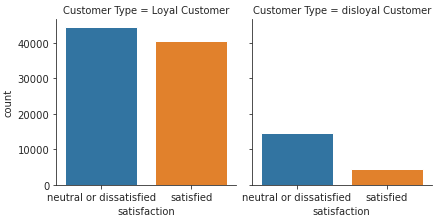

In [22]:
with sns.axes_style(style = 'ticks'):
    g = sns.catplot(x="satisfaction",col = 'Customer Type',data=train,kind = "count",col_wrap=2,height=3,aspect = 1)
plt.show()

The Loyal customers ratio in satisfaction is almost equal there is more dissatisfied passengers here.
There is less no.of disloyal customers and there ared dissatisfied more.

# Age

<AxesSubplot:xlabel='Age'>

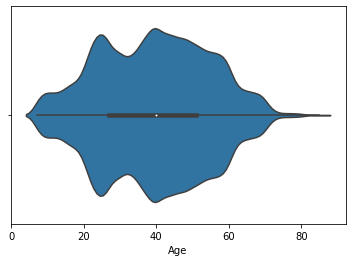

In [20]:
sns.violinplot(train['Age'])

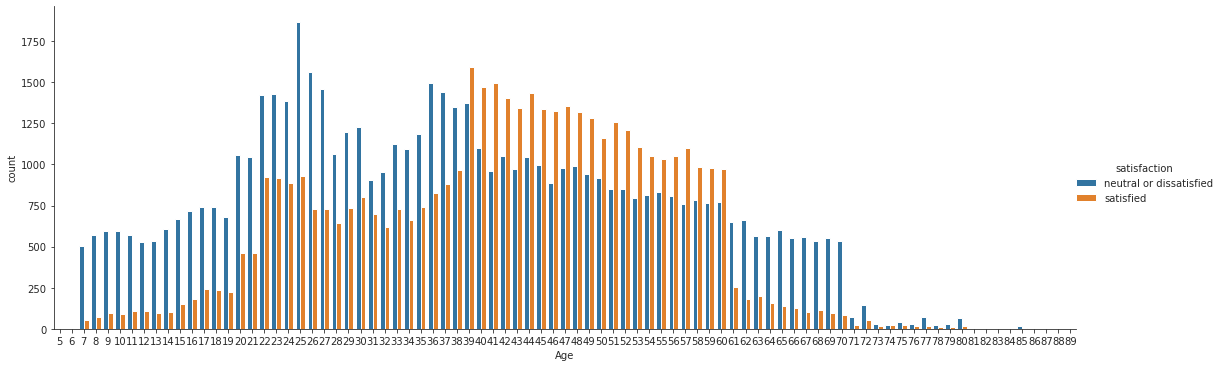

In [23]:

with sns.axes_style(style = 'ticks'):
    g = sns.catplot('Age',hue="satisfaction",data=train,kind = "count",aspect = 3,order=range(5,90))
plt.show()

From the visualisation we observe that ther is more dissatisfied people at the age of 25.
At the age from 0 - 38 and 61 - 70 there are more passengers who are dissatisfied and less people satisfied.
At the age from above 70 there are less people who are having there journey on flight.
The satisfied passengeres are more at the age of 39 - 60.

In [24]:
train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

<AxesSubplot:xlabel='satisfaction', ylabel='Age'>

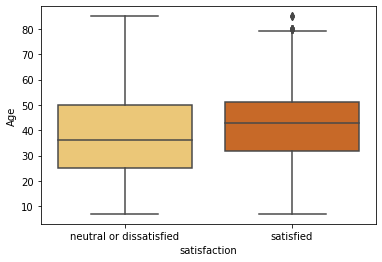

In [25]:
sns.boxplot(x = "satisfaction", y = "Age", palette = "YlOrBr", data = train)

From the above visualisation of box plot we observe that there is more dissatisfied passengers at the age around 39 to 50 on an average , 

# Type of Travel

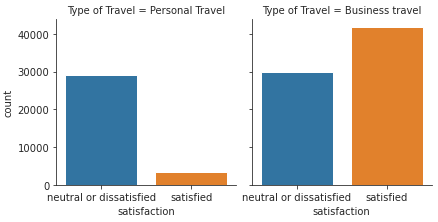

In [26]:
with sns.axes_style(style = 'ticks'):
    g = sns.catplot(x="satisfaction",col = 'Type of Travel',data=train,kind = "count",col_wrap=2,height=3,aspect = 1)
plt.show()

<AxesSubplot:xlabel='Type of Travel', ylabel='count'>

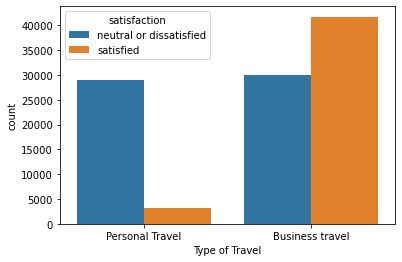

In [27]:
sns.countplot(x="Type of Travel",data = train,hue="satisfaction")

From the figure we can conclude that the people who travel personally are not satisfied and bussinel travel people are  travelled.Let's see what are the reasons

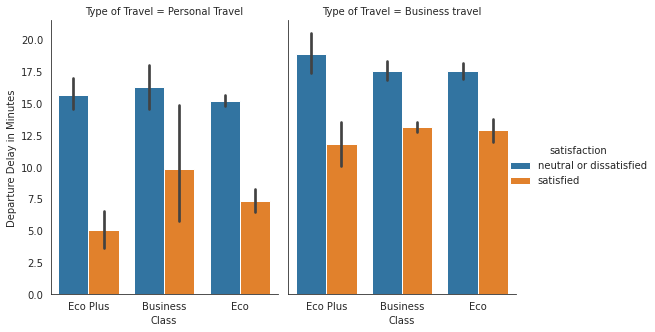

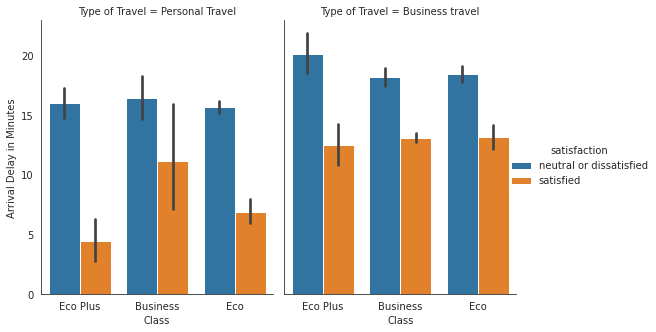

In [28]:
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure Delay in Minutes", hue="satisfaction", col="Type of Travel", data=train, kind="bar", height=4.5, aspect=.8)
    g = sns.catplot(x="Class", y="Arrival Delay in Minutes", hue="satisfaction", col="Type of Travel", data=train, kind="bar", height=4.5, aspect=.8)

# Class

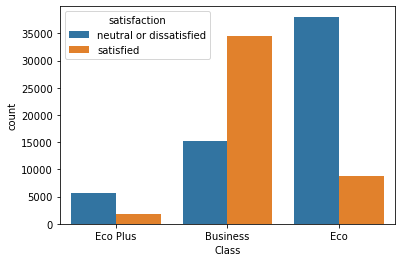

In [29]:
sns.countplot(x="Class",data = train,hue="satisfaction")
plt.show()

# Flight Distance

<AxesSubplot:xlabel='satisfaction', ylabel='Flight Distance'>

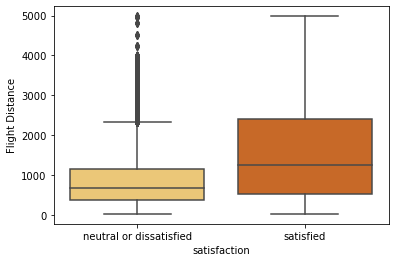

In [30]:
sns.boxplot(x = "satisfaction", y = "Flight Distance", palette = "YlOrBr", data = train)

<AxesSubplot:xlabel='Flight Distance'>

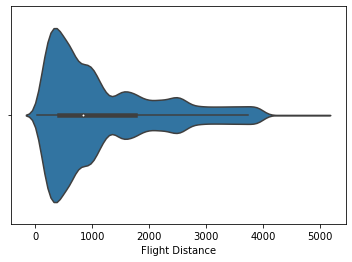

In [19]:
sns.violinplot(train['Flight Distance'])

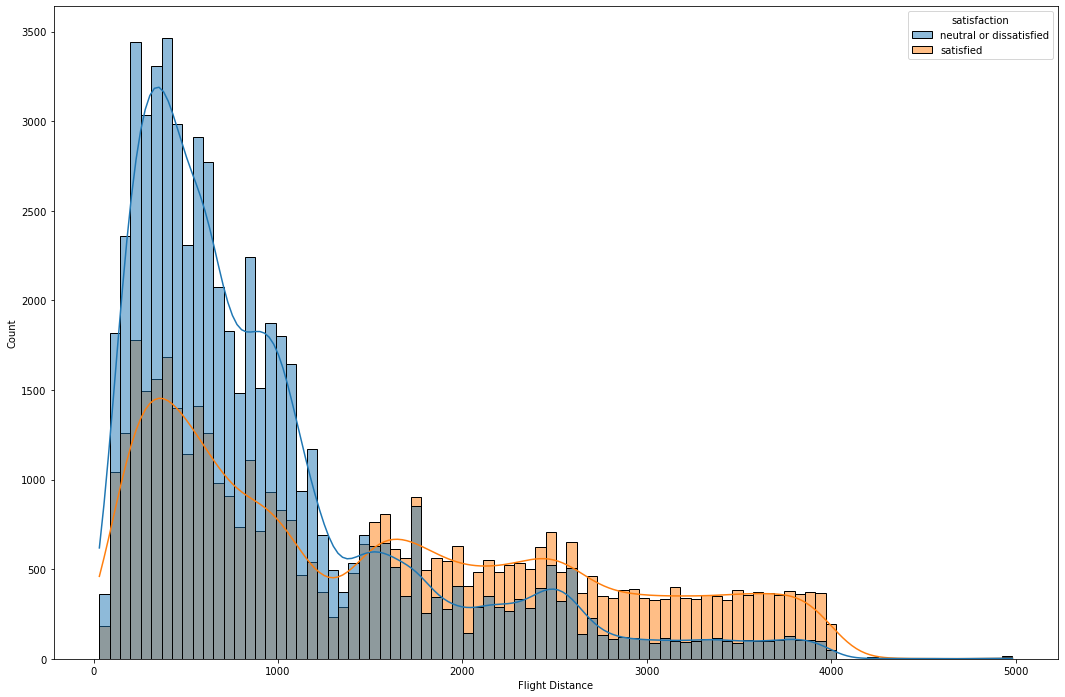

In [31]:
plt.figure(figsize=(18,12))
sns.histplot(x='Flight Distance',data=train,hue='satisfaction',kde=True)
plt.show()

# Inflight wifi service

<AxesSubplot:xlabel='Inflight wifi service', ylabel='count'>

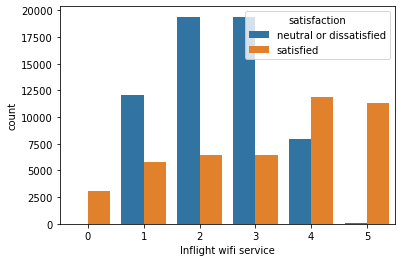

In [32]:
sns.countplot(x = 'Inflight wifi service' , data = train , hue = 'satisfaction')

The passengers are mostly dissatisifed at the rating between 1 to 3. and are satisfied at the rating from 4 to 5.
and also we observe that there are very few people who are dissatisfied at the rating 0 and 5.
Let's what are the reasons:

collaborating wifi service and entermainment with class and analysing the data

<Figure size 1440x1440 with 0 Axes>

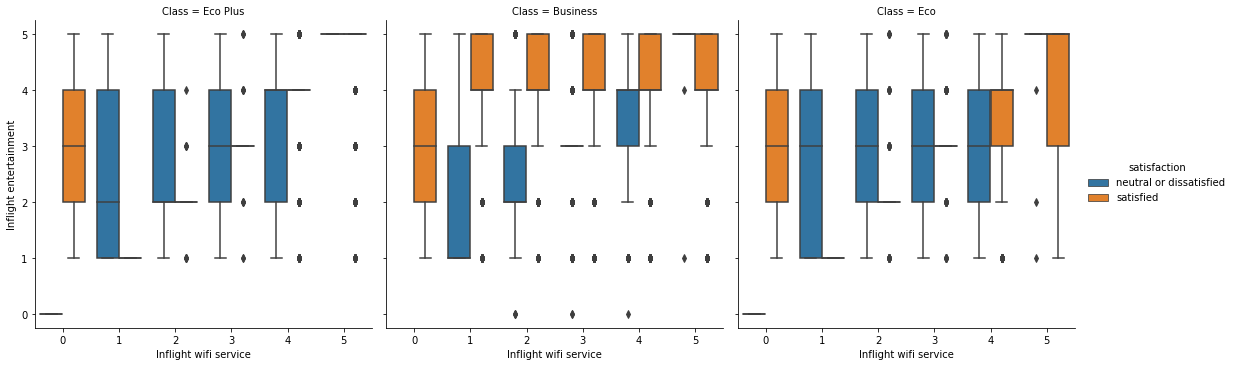

In [33]:
plt.figure(figsize=(20,20))
sns.catplot(x='Inflight wifi service',y = 'Inflight entertainment',data = train,hue='satisfaction',kind="box",col="Class")
plt.show()

The Eco Plus Passengers we observe that passengers are mostly satisfied at rating 0 without having wifi service.and dissatisfied quite high at ratin4 1 and medium  from 2 to 5 is quite high.
The Bussiness Passengers are mostly satisfied at the rating 5 of inflight entertainment. 
The Eco passengers are disatisfied when the wifi service is provided at the rating (2-4) and highly satisfied at the rating(0 and 5).

# Departure/Arrival time convenient

<AxesSubplot:xlabel='Departure/Arrival time convenient', ylabel='count'>

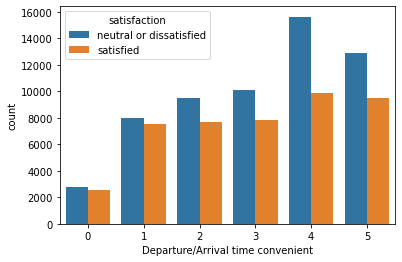

In [34]:
sns.countplot(x='Departure/Arrival time convenient' ,hue = "satisfaction" , data = train)

From the above visualisations we observe that there is satisfied and disatisfied are almost equal at Departure/Arrival time convenient rating of 0 and 1.and at 4 there is more people who disatisfied with airlines.

# Ease of Online booking

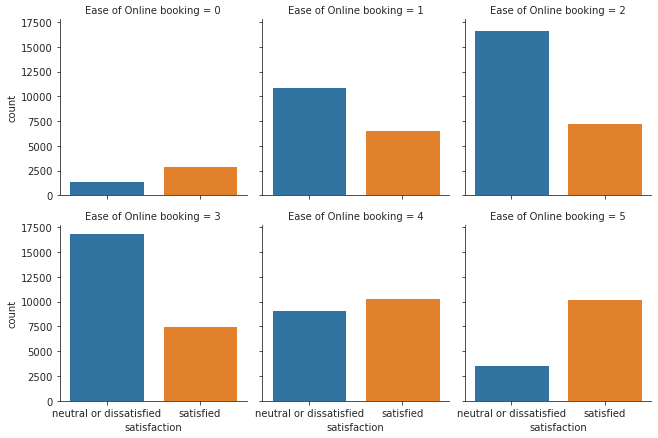

In [35]:
with sns.axes_style(style = 'ticks'):
    g = sns.catplot(x="satisfaction",col = 'Ease of Online booking',data=train,kind = "count",col_wrap=3,height=3,aspect = 1)
plt.show()

Ease of online booking is nothing but booking tickets online From the above visualisations we observe that there is more passengers who disatisfied with this service.

.......... Gate location .................


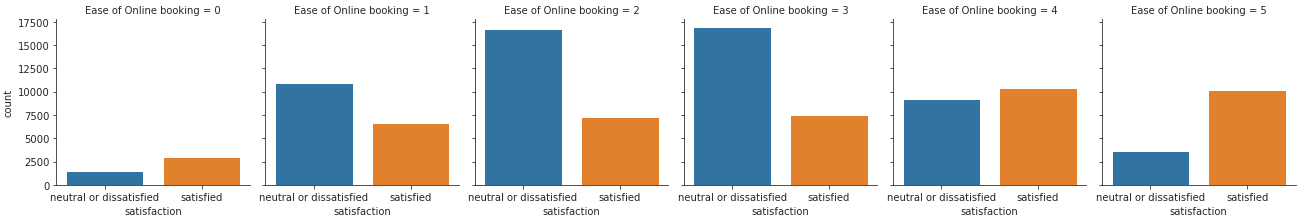

.......... Food and drink .................


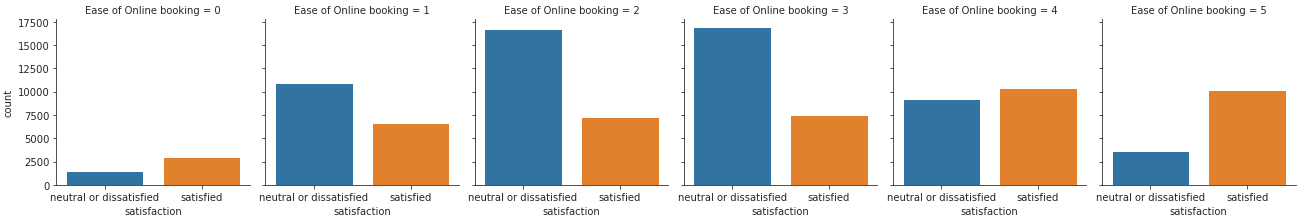

.......... Online boarding .................


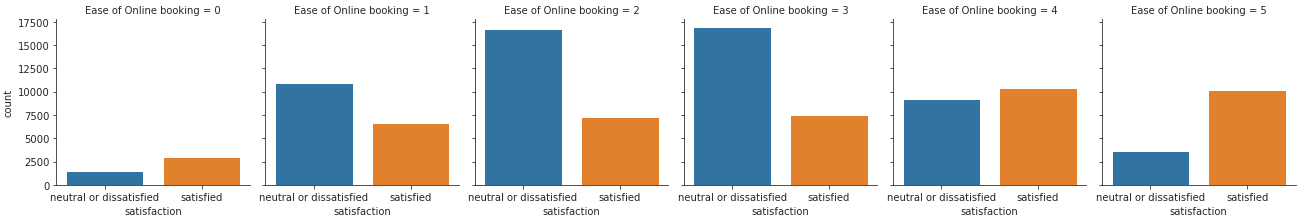

.......... Seat comfort .................


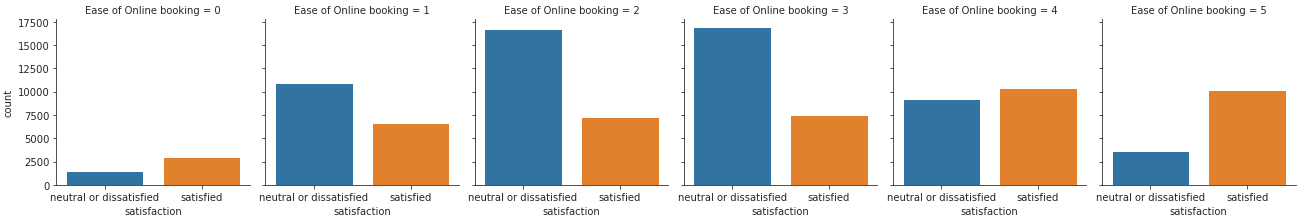

.......... Inflight entertainment .................


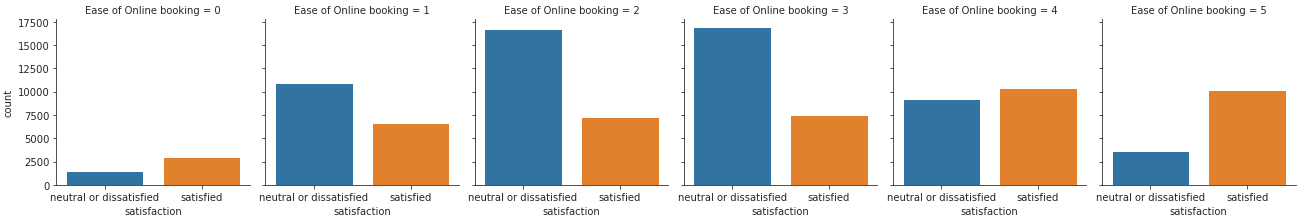

.......... On-board service .................


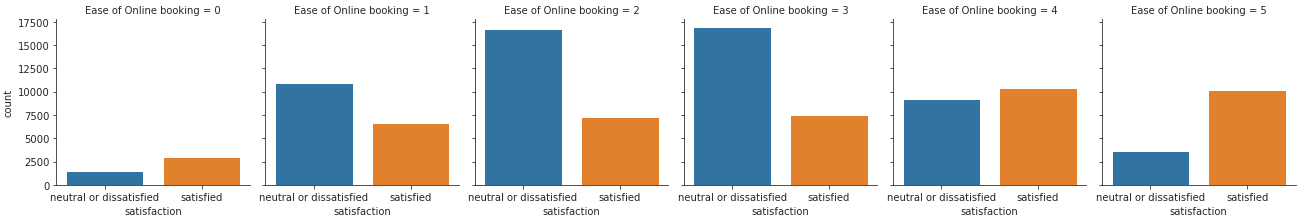

.......... Leg room service .................


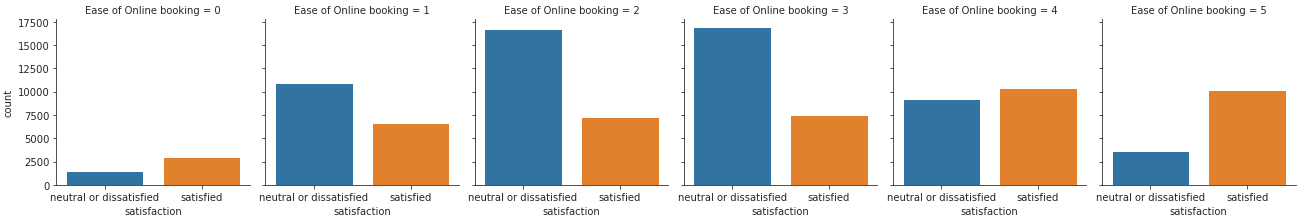

.......... Baggage handling .................


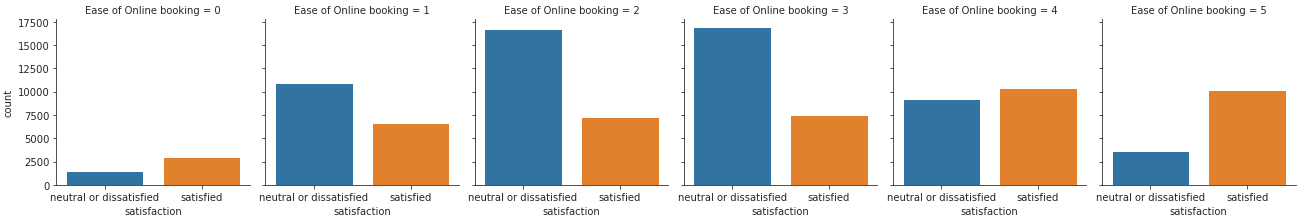

.......... Checkin service .................


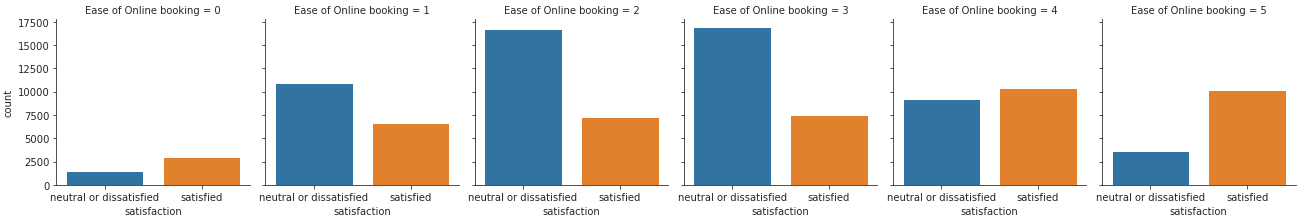

.......... Inflight service .................


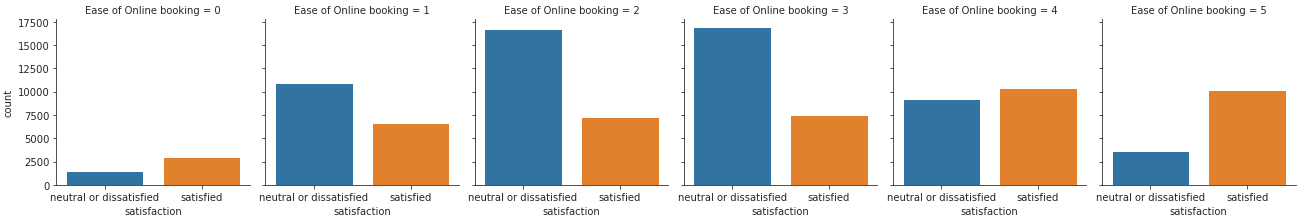

.......... Cleanliness .................


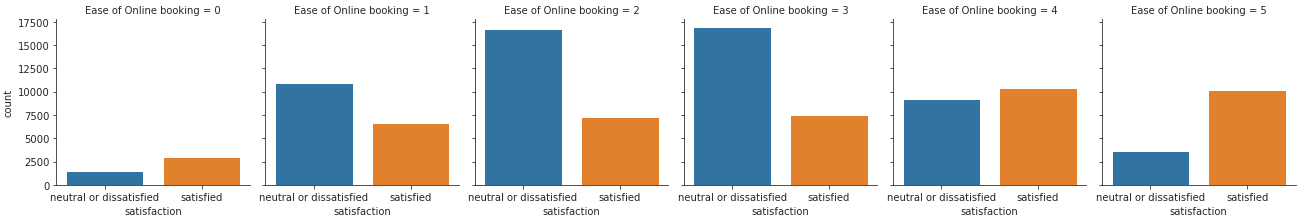

In [36]:
l=['Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness',]
for i in l:
    print("..........",i,".................")
    with sns.axes_style(style = 'ticks'):
        g = sns.catplot(x="satisfaction",col = 'Ease of Online booking',data=train,kind = "count",col_wrap=6,height=3,aspect = 1)
    plt.show()

In [37]:
train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

# Seat comfort and leg room service

<Figure size 1440x1440 with 0 Axes>

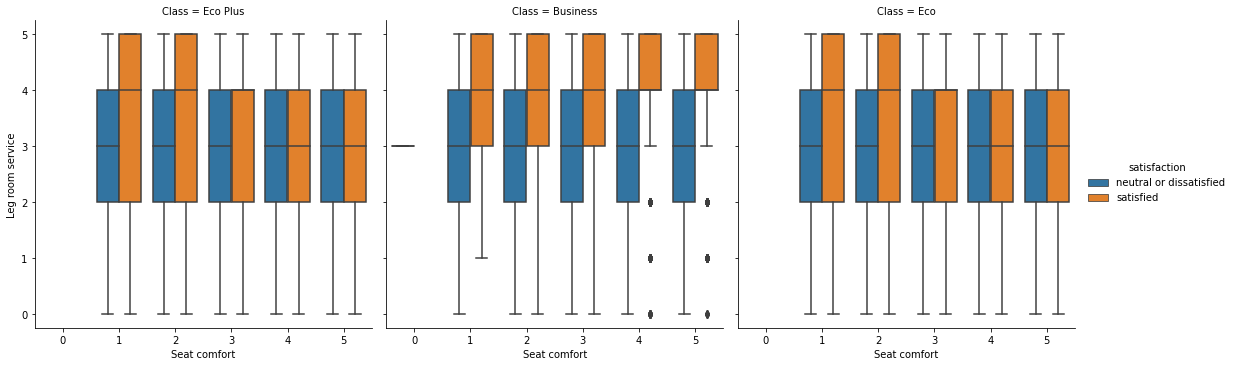

In [14]:
plt.figure(figsize=(20,20))
sns.catplot(x='Seat comfort',y = 'Leg room service',data = train,hue='satisfaction',kind="box",col="Class")
plt.show()

From the visualisation we obeserve that Both Male and female satisfaction is similar .However Male are more satisfied at the seat comfort  rating of 3 and female are less satisfied at rating 5

# Departure and Arrival Delay in Minutes

In [24]:
data = train.drop(['Departure Delay in Minutes','Arrival Delay in Minutes'],axis=1)

In [ ]:
with sns.axes_style('white'):
    sns.jointplot('Departure Delay in Minutes','Arrival Delay in Minutes', data = train, kind='kde');

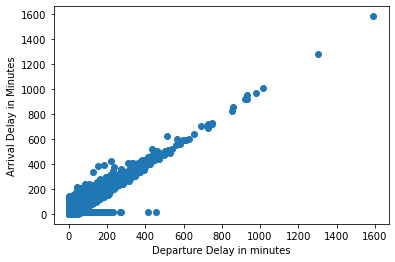

In [38]:
plt.scatter(train['Departure Delay in Minutes'],train['Arrival Delay in Minutes'])
plt.xlabel("Departure Delay in minutes")
plt.ylabel("Arrival Delay in Minutes")
plt.show()

In [ ]:

g = sns.lmplot('Departure Delay in Minutes','Arrival Delay in Minutes',hue='satisfaction', data=train  ,markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="r", ls=":");

In [9]:
train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

You can see that the points lined up more or less along a straight line going from the lower left corner to the upper right. Thus, in some approximation the dependence of the arrival time delay on the departure time delay is linear.

The results obtained are quite logical and can be explained as follows. If the flight of the airline's customers was delayed by a certain amount of time at departure, then the flight will be delayed by about the same amount of time at landing (provided that the aircraft does not accelerate in flight to make up for lost time

so we drop any one column from these two and also another reason is these 2 variable are highly correleated

<AxesSubplot:>

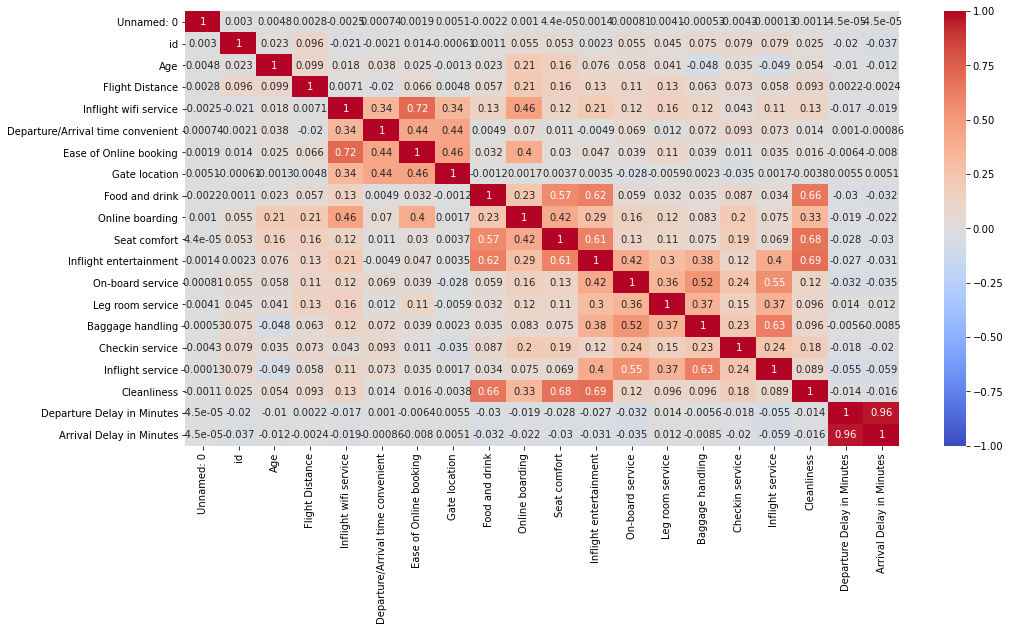

In [39]:

# Making a heatmap for the numeric data to understand how they correlate in pairs
plt.figure(figsize=(16,8))
sns.heatmap(train.corr(),annot=True,cmap="coolwarm", vmin=-1)


<Figure size 1152x576 with 0 Axes>

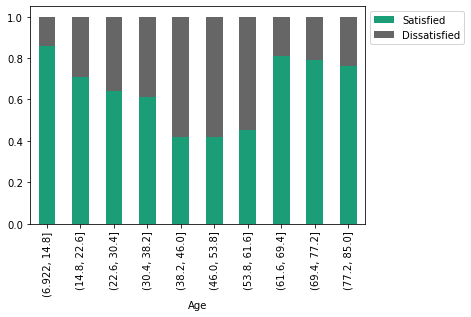

In [40]:

# Visualizing the target by bins of Age, showed in percentage of each column (normalized)
plt.figure(figsize=(16,8))
pd.crosstab(pd.cut(train["Age"],bins=10),train.satisfaction,normalize='index').round(2).plot.bar(stacked=True,cmap="Dark2")

plt.legend(labels=["Satisfied","Dissatisfied"],bbox_to_anchor=(1,1))
plt.show()

<AxesSubplot:xlabel='Seat comfort', ylabel='Leg room service'>

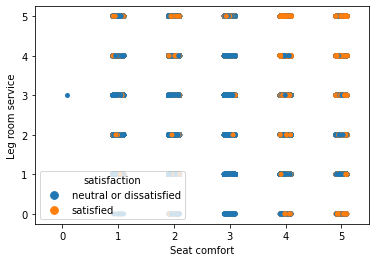

In [41]:
sns.stripplot('Seat comfort','Leg room service',data=train,hue='satisfaction')

<AxesSubplot:xlabel='Flight Distance', ylabel='Density'>

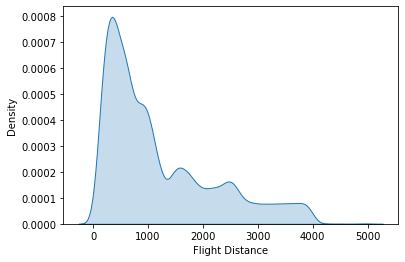

In [49]:
sns.kdeplot(train['Flight Distance'],shade = True)

In [50]:
train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'satisfaction'],
      dtype='object')

<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='Density'>

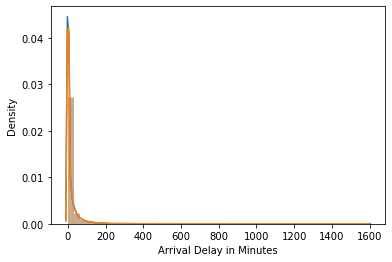

In [56]:
sns.distplot(train['Departure Delay in Minutes'])
sns.distplot(train['Arrival Delay in Minutes'])

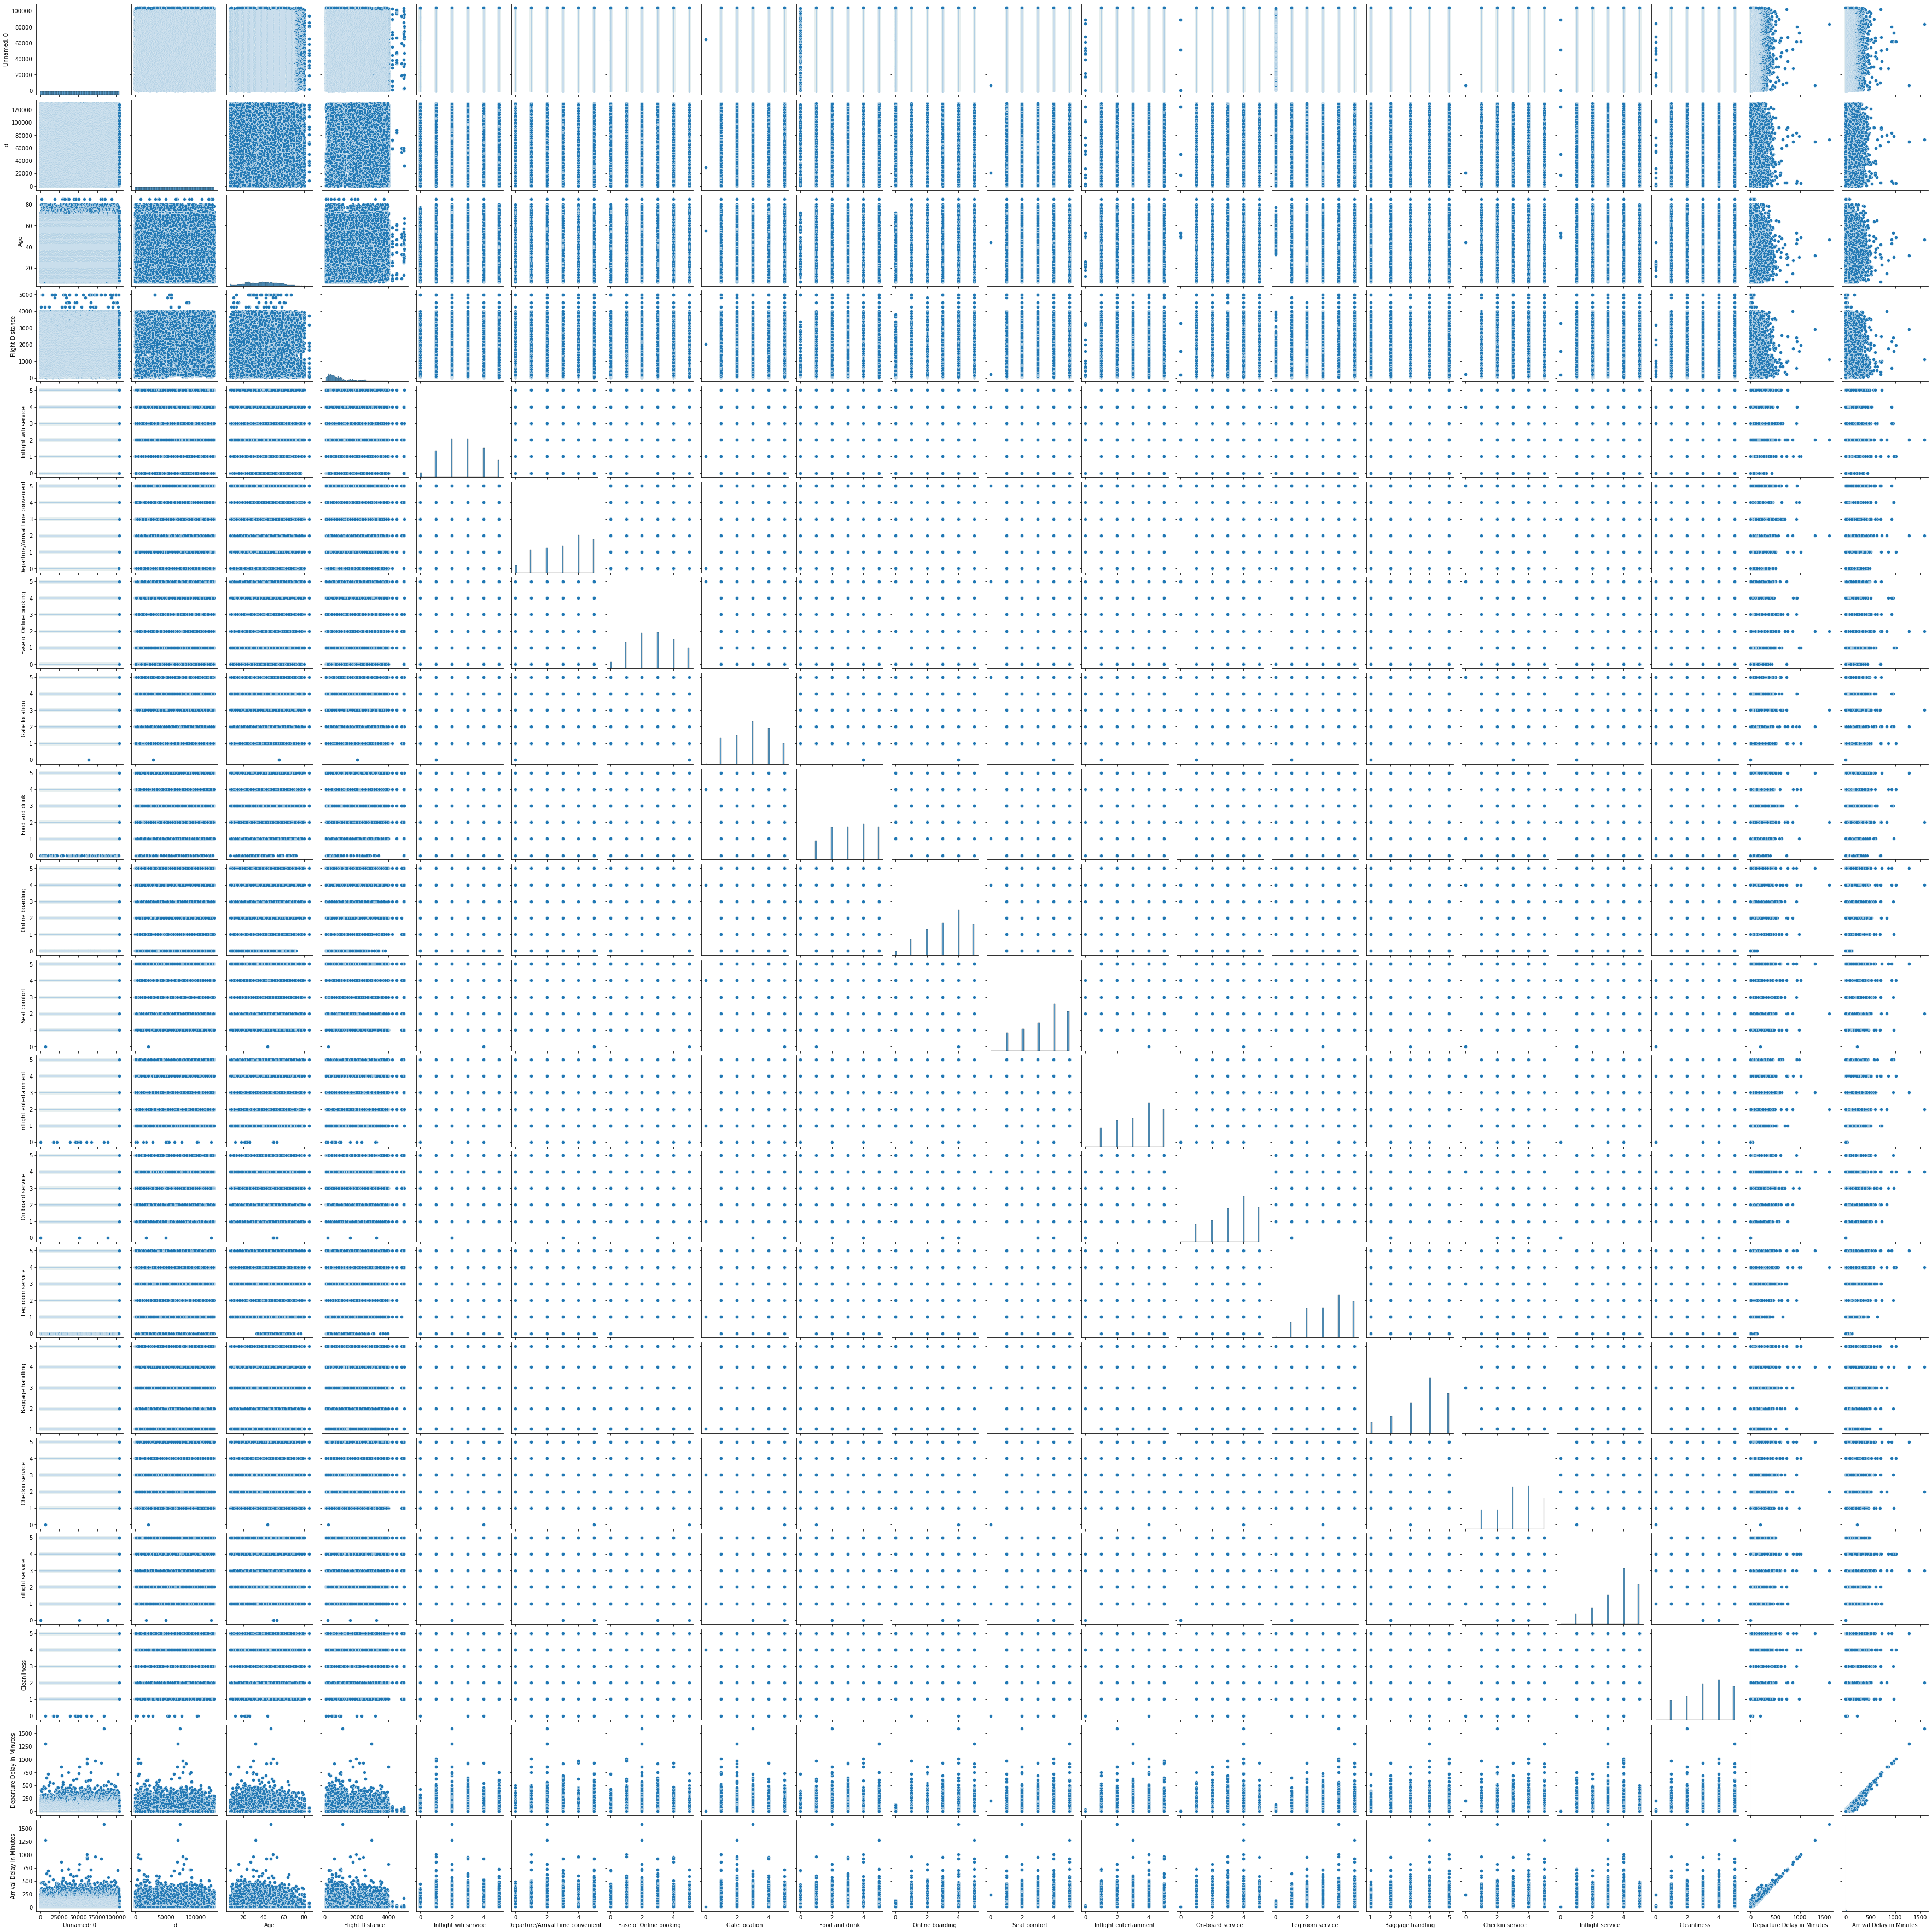

In [58]:
sns.kdeplot(train)

In [42]:
train = train.drop(['Arrival Delay in Minutes'],axis=1)
test = test.drop(['Arrival Delay in Minutes'],axis=1)

In [42]:
train.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

# Encoding the data

In [29]:
l=[]
for i in train.columns:
    if(train[i].dtype=='object'):
        l.append(i)

In [30]:
l=[]
for i in test.columns:
    if(test[i].dtype=='object'):
        l.append(i)

In [31]:
for x in l:
    print(train[x].value_counts())
    print("............................")
    print(l)

Female    52727
Male      51177
Name: Gender, dtype: int64
............................
['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64
............................
['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64
............................
['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64
............................
['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64
............................
['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [32]:
for x in l:
    print(test[x].value_counts())
    print("............................")
    

Female    13172
Male      12804
Name: Gender, dtype: int64
............................
Loyal Customer       21177
disloyal Customer     4799
Name: Customer Type, dtype: int64
............................
Business travel    18038
Personal Travel     7938
Name: Type of Travel, dtype: int64
............................
Business    12495
Eco         11564
Eco Plus     1917
Name: Class, dtype: int64
............................
neutral or dissatisfied    14573
satisfied                  11403
Name: satisfaction, dtype: int64
............................


In [33]:
from sklearn.preprocessing import LabelBinarizer,LabelEncoder
encoder1 = LabelBinarizer()
encoder2 = LabelEncoder()
for x in l:
    if(x!='Class'):
        train[x] = encoder1.fit_transform(train[x])
    else:        
        train[x] = encoder2.fit_transform(train[x])

In [34]:
from sklearn.preprocessing import LabelBinarizer,LabelEncoder
encoder1 = LabelBinarizer()
encoder2 = LabelEncoder()
for x in l:
    if(x!='Class'):
        test[x] = encoder1.fit_transform(test[x])
    else:        
        test[x] = encoder2.fit_transform(test[x])

In [35]:
train.head()

Unnamed: 0      id  Gender  Customer Type  Age  Type of Travel  Class  \
0           0   70172       1              0   13               1      2   
1           1    5047       1              1   25               0      0   
2           2  110028       0              0   26               0      0   
3           3   24026       0              0   25               0      0   
4           4  119299       1              0   61               0      0   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                       3              1               5                3   
1                       3              3               1                3   
2                       2              2               5                5   
3                       5              5               2                2   
4                       3              3               4                5   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0             5                       5                 4                 3   
1             1                       1                 1                 5   
2             5                       5                 4                 3   
3             2                       2                 2                 5   
4             5                       3                 3                 4   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   Departure Delay in Minutes  satisfaction  
0                          25             0  
1                           1             0  
2                           0             1  
3                          11             0  
4                           0             1

In [36]:
test.head()

Unnamed: 0     id  Gender  Customer Type  Age  Type of Travel  Class  \
0           0  19556       0              0   52               0      1   
1           1  90035       0              0   36               0      0   
2           2  12360       1              1   20               0      1   
3           3  77959       1              0   44               0      0   
4           4  36875       0              0   49               0      1   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              160                      5                                  4   
1             2863                      1                                  1   
2              192                      2                                  0   
3             3377                      0                                  0   
4             1182                      2                                  3   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                       3              4               3                4   
1                       3              1               5                4   
2                       2              4               2                2   
3                       0              2               3                4   
4                       4              3               4                1   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0             3                       5                 5                 5   
1             5                       4                 4                 4   
2             2                       2                 4                 1   
3             4                       1                 1                 1   
4             2                       2                 2                 2   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 5                2                 5            5   
1                 4                3                 4            5   
2                 3                2                 2            2   
3                 1                3                 1            4   
4                 2                4                 2            4   

   Departure Delay in Minutes  satisfaction  
0                          50             1  
1                           0             1  
2                           0             0  
3                           0             1  
4                           0             1

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Unnamed: 0                         103904 non-null  int64
 1   id                                 103904 non-null  int64
 2   Gender                             103904 non-null  int32
 3   Customer Type                      103904 non-null  int32
 4   Age                                103904 non-null  int64
 5   Type of Travel                     103904 non-null  int32
 6   Class                              103904 non-null  int32
 7   Flight Distance                    103904 non-null  int64
 8   Inflight wifi service              103904 non-null  int64
 9   Departure/Arrival time convenient  103904 non-null  int64
 10  Ease of Online booking             103904 non-null  int64
 11  Gate location                      103904 non-null  int64
 12  Fo

# Low Variance data

In [38]:
#variance
for x in train.columns:
    print(train[x].var())

899678760.0
1403537228.419472
0.2499467717360953
0.14930833853689748
228.46212764441466
0.2140436747841498
0.38539085349911434
994302.6990663074
1.7631311046832476
2.325854357371927
1.957003669474602
1.6323154459607156
1.767657229241905
1.8211744161534347
1.7399918817732971
1.7768642452817334
1.6598569592537042
1.7308155143891055
1.3945328662903815
1.6012265988047287
1.382183569222262
1.722060025147576
1461.60175947657
0.24555783332041425


In [39]:
from sklearn.preprocessing import normalize
normalize  = normalize(train)

In [40]:
data_scaled = pd.DataFrame(normalize)
data_scaled.var()

0     8.304264e-02
1     7.558568e-02
2     2.157863e-10
3     9.522851e-11
4     7.067959e-07
5     1.602599e-10
6     3.057297e-10
7     7.401737e-04
8     3.200867e-09
9     4.457937e-09
10    3.460658e-09
11    3.569888e-09
12    4.435501e-09
13    4.377689e-09
14    4.977551e-09
15    4.868952e-09
16    4.765091e-09
17    4.482168e-09
18    5.002111e-09
19    4.665725e-09
20    5.065939e-09
21    4.625686e-09
22    8.203563e-07
23    1.791540e-10
dtype: float64

In [41]:
#storing the variance and name of variables

variance = data_scaled.var()
columns = train.columns

In [42]:
#saving the names of variables having variance more than a threshold value

variable = [ ]

for i in range(0,len(variance)):
    if variance[i]>=0.006: #setting the threshold as 1%
        variable.append(columns[i])

In [43]:
variable

['Unnamed: 0', 'id']

In [44]:
#so we drop these 2 columns as these got low variance

# For testing data

In [45]:
#variance
for x in test.columns:
    print(test[x].var())

56231546.0
1414626936.6921873
0.24995944727831715
0.1506216340069818
229.08896826063057
0.21221283405759556
0.3890050103255946
997369.7296854607
1.7832505610418345
2.3512252577563544
1.9964314731326334
1.6438641414166653
1.7729092346439572
1.8374770210629965
1.742638086300885
1.7910451774098544
1.6437505739362426
1.739397853886387
1.3842102786522426
1.611203884655038
1.3940075269002217
1.7406318218375514
1400.4929076623819
0.24628630174067437


In [46]:
from sklearn.preprocessing import normalize
normalize  = normalize(train)
data_scaled = pd.DataFrame(normalize)
data_scaled.var()

0     8.304264e-02
1     7.558568e-02
2     2.157863e-10
3     9.522851e-11
4     7.067959e-07
5     1.602599e-10
6     3.057297e-10
7     7.401737e-04
8     3.200867e-09
9     4.457937e-09
10    3.460658e-09
11    3.569888e-09
12    4.435501e-09
13    4.377689e-09
14    4.977551e-09
15    4.868952e-09
16    4.765091e-09
17    4.482168e-09
18    5.002111e-09
19    4.665725e-09
20    5.065939e-09
21    4.625686e-09
22    8.203563e-07
23    1.791540e-10
dtype: float64

In [47]:
#saving the names of variables having variance more than a threshold value

variable = [ ]

for i in range(0,len(variance)):
    if variance[i]>=0.006: #setting the threshold as 1%
        variable.append(columns[i])

In [48]:
variable

['Unnamed: 0', 'id']

In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Unnamed: 0                         25976 non-null  int64
 1   id                                 25976 non-null  int64
 2   Gender                             25976 non-null  int32
 3   Customer Type                      25976 non-null  int32
 4   Age                                25976 non-null  int64
 5   Type of Travel                     25976 non-null  int32
 6   Class                              25976 non-null  int32
 7   Flight Distance                    25976 non-null  int64
 8   Inflight wifi service              25976 non-null  int64
 9   Departure/Arrival time convenient  25976 non-null  int64
 10  Ease of Online booking             25976 non-null  int64
 11  Gate location                      25976 non-null  int64
 12  Food and drink    

In [50]:
#converting float to int datatype
#train['Arrival Delay in Minutes'] = train['Arrival Delay in Minutes'].astype(int)

In [51]:
#converting float to int datatype
#test['Arrival Delay in Minutes'] = test['Arrival Delay in Minutes'].astype(int)

# outliers

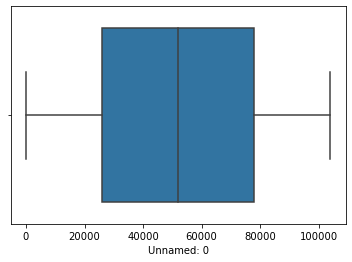

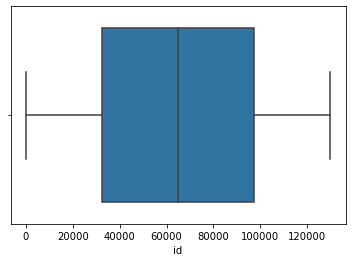

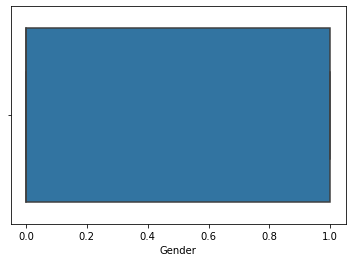

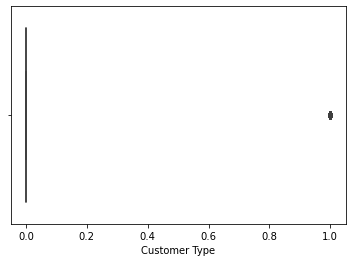

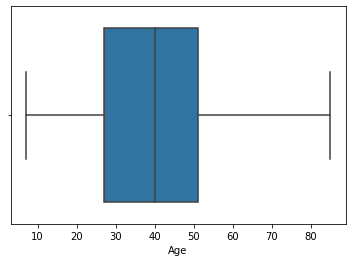

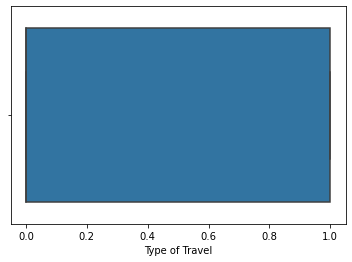

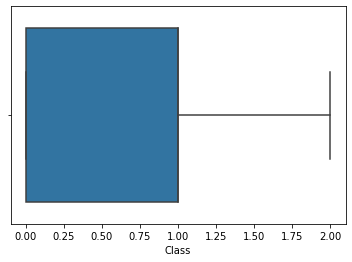

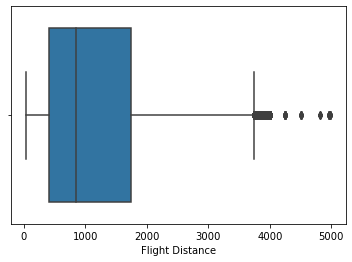

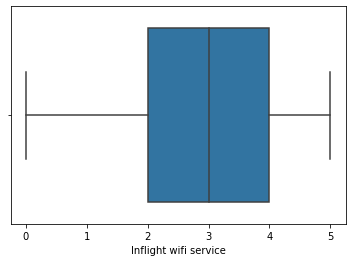

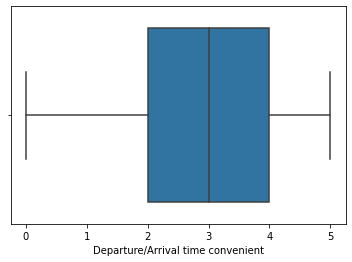

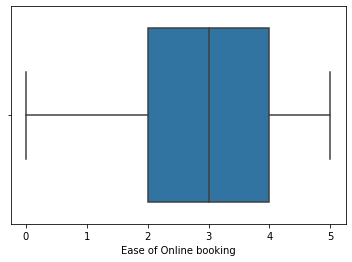

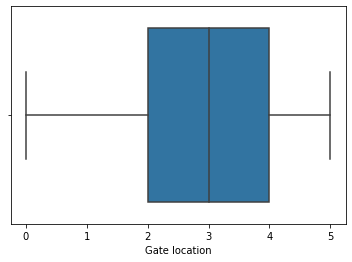

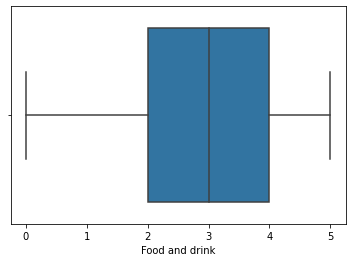

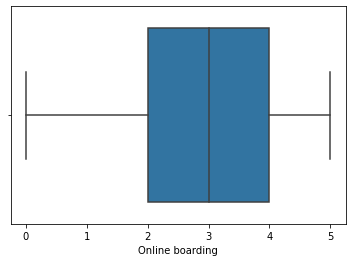

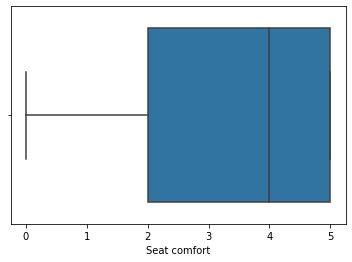

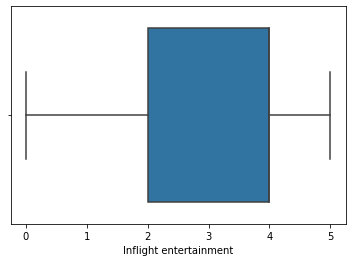

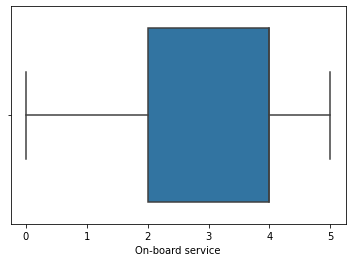

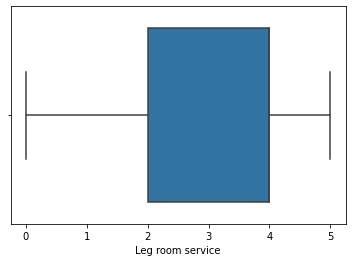

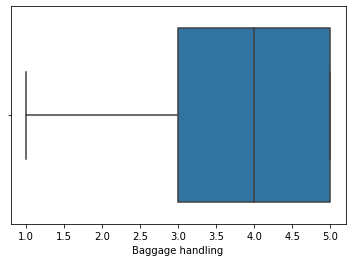

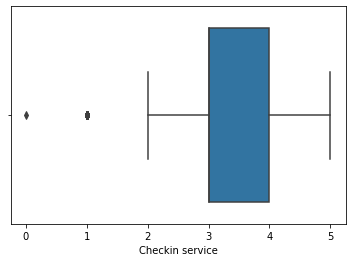

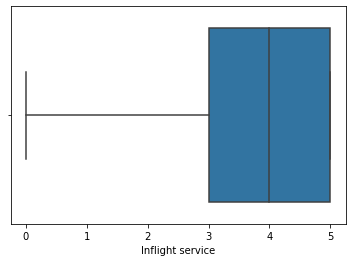

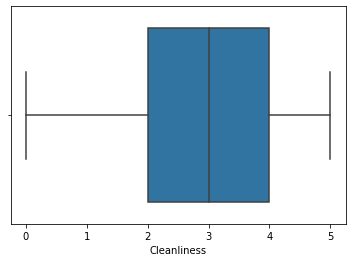

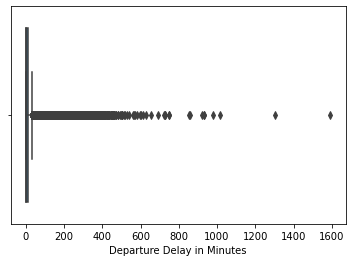

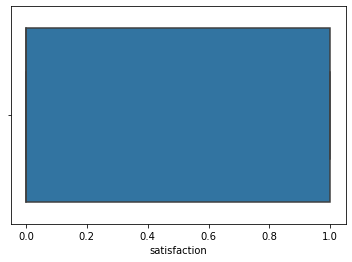

In [52]:
# Display the box plot to show the outliers
import seaborn as sns
for x in train.columns:
    sns.boxplot(x=train[x])
    plt.show()

In [70]:
train.shape

(103904, 25)

In [70]:
# Eliminate the outlier in 'Flight Distance' and write data to new file

am_UL = round(train['Flight Distance'].mean() + 3 * train['Flight Distance'].std(),3)
am_LL = round(train['Flight Distance'].mean() - 3 * train['Flight Distance'].std(),3)
train_BK_02 = train[(train['Flight Distance'] > am_LL) & (train['Flight Distance'] < am_UL)]
train_BK_02.shape

(103846, 24)

In [ ]:
# Eliminate the outlier in 'Departure Delay in Minute' and write data to new file

am_UL = round(train_BK_02['Departure Delay in Minutes'].mean() + 3 * train_BK_02['Departure Delay in Minutes'].std(),3)
am_LL = round(train_BK_02['Departure Delay in Minutes'].mean() - 3 * train_BK_02['Departure Delay in Minutes'].std(),3)
train_BK_03 = train_BK_02[(train_BK_02['Departure Delay in Minutes'] > am_LL) & (train_BK_02['Departure Delay in Minutes'] < am_UL)]
train_BK_03.shape

In [ ]:
# Eliminate the outlier in 'Arrival Delay in Minutes' and write data to new file

am_UL = round(train_BK_03['Arrival Delay in Minutes'].mean() + 3 * train_BK_03['Arrival Delay in Minutes'].std(),3)
am_LL = round(train_BK_03['Arrival Delay in Minutes'].mean() - 3 * train_BK_03['Arrival Delay in Minutes'].std(),3)
train_BK_04 = train_BK_03[(train_BK_03['Arrival Delay in Minutes'] > am_LL) & (train_BK_03['Arrival Delay in Minutes'] < am_UL)]
train_BK_04.shape


In [ ]:
train = train_BK_03.copy()

In [53]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Unnamed: 0                           51951.5
id                                   64834.5
Gender                                   1.0
Customer Type                            0.0
Age                                     24.0
Type of Travel                           1.0
Class                                    1.0
Flight Distance                       1329.0
Inflight wifi service                    2.0
Departure/Arrival time convenient        2.0
Ease of Online booking                   2.0
Gate location                            2.0
Food and drink                           2.0
Online boarding                          2.0
Seat comfort                             3.0
Inflight entertainment                   2.0
On-board service                         2.0
Leg room service                         2.0
Baggage handling                         2.0
Checkin service                          1.0
Inflight service                         2.0
Cleanliness                              2.0
Departure 

In [54]:
# Removing outliers from dataset
train = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train.shape

(62654, 24)

# outliers for testing data

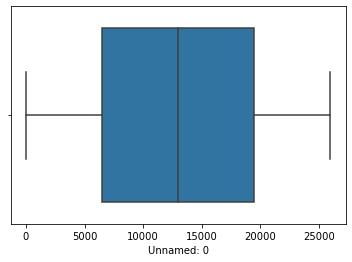

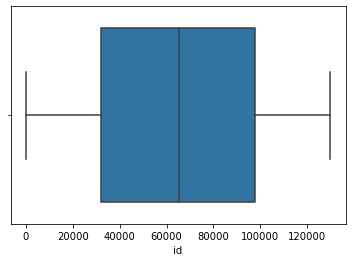

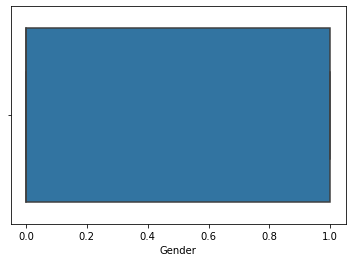

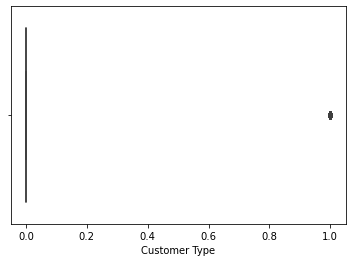

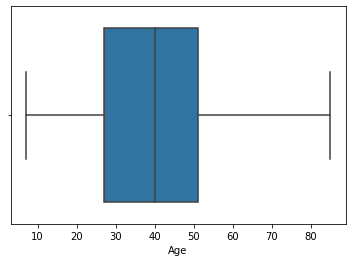

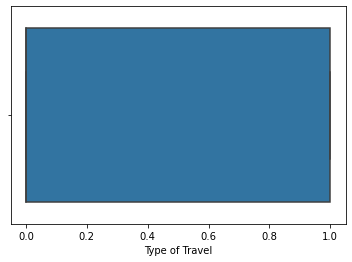

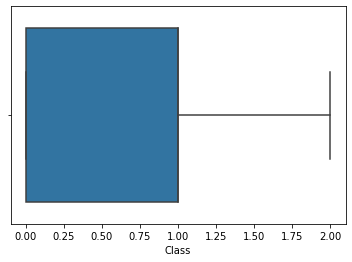

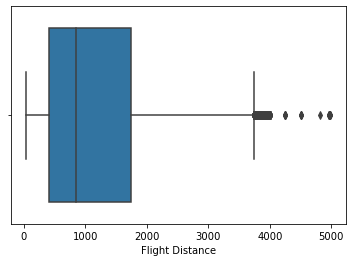

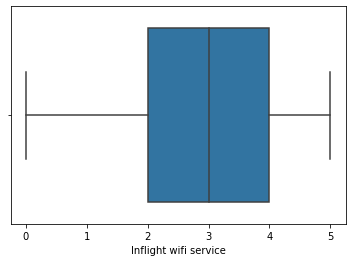

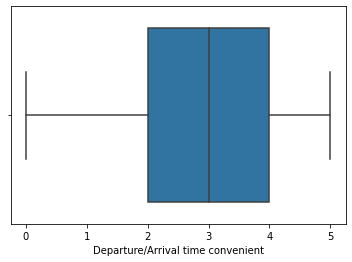

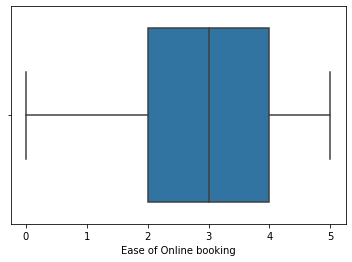

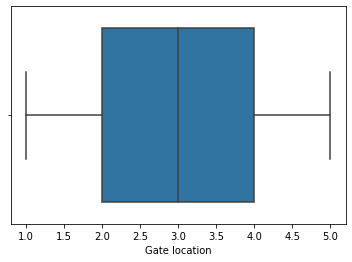

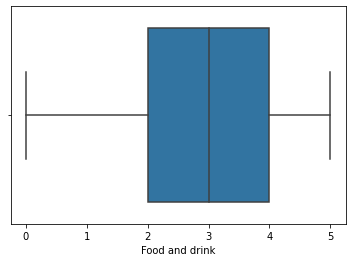

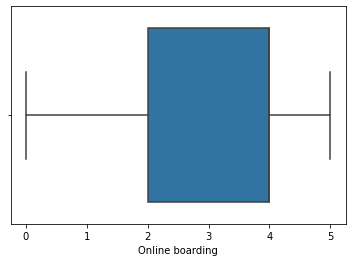

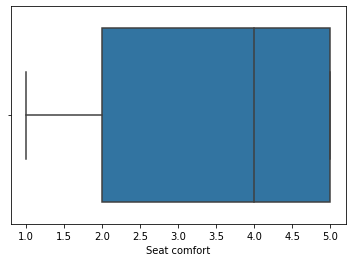

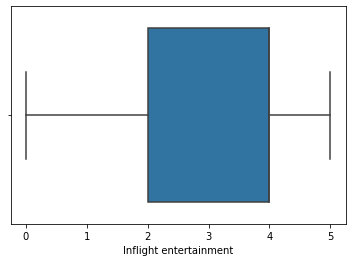

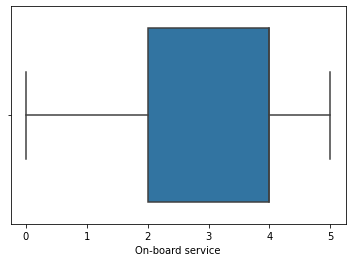

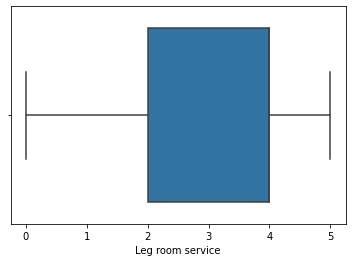

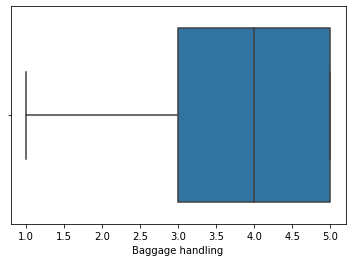

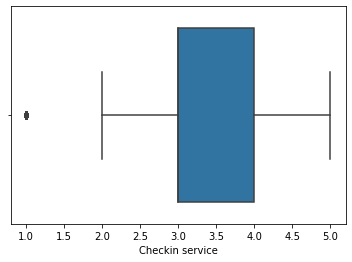

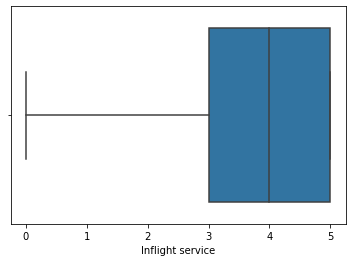

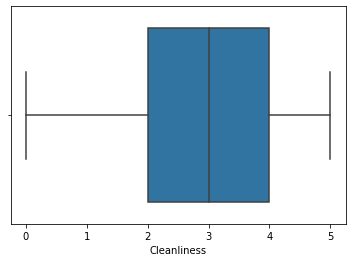

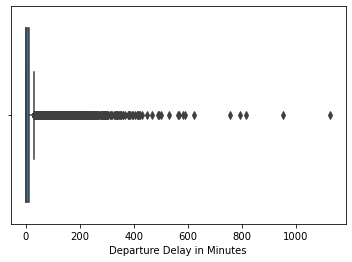

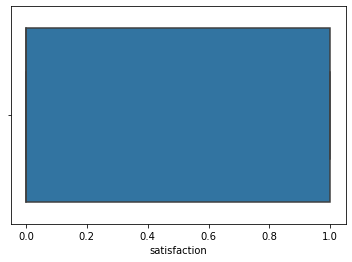

In [55]:
# Display the box plot to show the outliers
import seaborn as sns
for x in test.columns:
    sns.boxplot(x=test[x])
    plt.show()

In [56]:
test.shape

(25976, 24)

In [ ]:
# Eliminate the outlier in 'Flight Distance' and write data to new file

am_UL = round(test['Flight Distance'].mean() + 3 * test['Flight Distance'].std(),3)
am_LL = round(test['Flight Distance'].mean() - 3 * test['Flight Distance'].std(),3)
test_BK_02 = test[(test['Flight Distance'] > am_LL) & (test['Flight Distance'] < am_UL)]
test_BK_02.shape

In [ ]:
# Eliminate the outlier in 'Departure Delay in Minute' and write data to new file

am_UL = round(test_BK_02['Departure Delay in Minutes'].mean() + 3 * test_BK_02['Departure Delay in Minutes'].std(),3)
am_LL = round(test_BK_02['Departure Delay in Minutes'].mean() - 3 * test_BK_02['Departure Delay in Minutes'].std(),3)
test_BK_03 = test_BK_02[(test_BK_02['Departure Delay in Minutes'] > am_LL) & (test_BK_02['Departure Delay in Minutes'] < am_UL)]
test_BK_03.shape

In [ ]:
# Eliminate the outlier in 'Arrival Delay in Minutes' and write data to new file

'''
am_UL = round(test_BK_03['Arrival Delay in Minutes'].mean() + 3 * test_BK_03['Arrival Delay in Minutes'].std(),3)
am_LL = round(test_BK_03['Arrival Delay in Minutes'].mean() - 3 * test_BK_03['Arrival Delay in Minutes'].std(),3)
test_BK_04 = test_BK_03[(train_BK_03['Arrival Delay in Minutes'] > am_LL) & (test_BK_03['Arrival Delay in Minutes'] < am_UL)]
test_BK_04.shape
'''

In [ ]:
test = test.copy()

In [57]:
Q1 = test.quantile(0.25)
Q3 = test.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Unnamed: 0                           12987.50
id                                   65413.75
Gender                                   1.00
Customer Type                            0.00
Age                                     24.00
Type of Travel                           1.00
Class                                    1.00
Flight Distance                       1330.00
Inflight wifi service                    2.00
Departure/Arrival time convenient        2.00
Ease of Online booking                   2.00
Gate location                            2.00
Food and drink                           2.00
Online boarding                          2.00
Seat comfort                             3.00
Inflight entertainment                   2.00
On-board service                         2.00
Leg room service                         2.00
Baggage handling                         2.00
Checkin service                          1.00
Inflight service                         2.00
Cleanliness                       

In [58]:

# Removing outliers from dataset
test = test[~((test < (Q1 - 1.5 * IQR)) |(test > (Q3 + 1.5 * IQR))).any(axis=1)]
test.shape

(15650, 24)

# Splitting the Data

In [59]:
x_train=train.drop(['satisfaction','Unnamed: 0', 'id'],axis=1)

In [60]:
y_train=train['satisfaction']

In [61]:

x_test=test.drop(['satisfaction','Unnamed: 0', 'id'],axis=1)
y_test=test['satisfaction']

# MinMaxScaler

In [62]:
cols2=['Age','Flight Distance','Departure Delay in Minutes']

In [63]:
x_train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes'],
      dtype='object')

In [64]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols2] = mmscaler.fit_transform(x_train[cols2])
x_train = pd.DataFrame(x_train)

x_test[cols2] = mmscaler.fit_transform(x_test[cols2])
x_test = pd.DataFrame(x_test)

In [130]:
params_rf = {'max_depth': 25,
         'min_samples_leaf': 1,
         'min_samples_split': 2,
         'n_estimators': 1200,
         'random_state': 42}

params_dt = {'max_depth': 12,    
             'max_features': "sqrt"}

params_xgb ={'n_estimators': 500,
            'max_depth': 16,
            }

params_lgb ={'colsample_bytree': 0.85, 
         'max_depth': 15, 
         'min_split_gain': 0.1, 
         'n_estimators': 200, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

params_lr = {'penalty': 'elasticnet', 'l1_ratio':0.5, 'solver': 'saga'}

In [78]:
#Models

Model Name:  LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')
Confusion matrix : 
 [[7105  939]
 [ 855 6751]]
Outcome values : 
 7105 939 855 6751
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.88      0.89      8044
           0       0.88      0.89      0.88      7606

    accuracy                           0.89     15650
   macro avg       0.89      0.89      0.89     15650
weighted avg       0.89      0.89      0.89     15650

Accuracy : 88.5 %
Precision : 89.3 %
Recall : 88.3 %
F1 Score : 0.888
Specificity or True Negative Rate : 88.8 %
Balanced Accuracy : 88.6 %
MCC : 0.771
roc_auc_score: 0.885


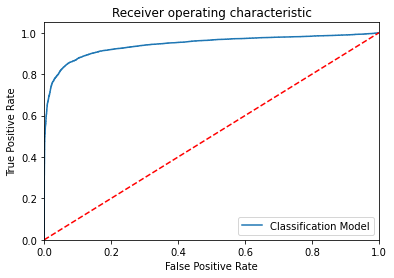

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier(max_depth=12, max_features='sqrt')
Confusion matrix : 
 [[7573  471]
 [ 370 7236]]
Outcome values : 
 7573 471 370 7236
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.94      0.95      8044
           0       0.94      0.95      0.95      7606

    accuracy                           0.95     15650
   macro avg       0.95      0.95      0.95     15650
weighted avg       0.95      0.95      0.95     15650

Accuracy : 94.6 %
Precision : 95.3 %
Recall : 94.1 %
F1 Score : 0.947
Specificity or True Negative Rate : 95.1 %
Balanced Accuracy : 94.6 %
MCC : 0.893
roc_auc_score: 0.946


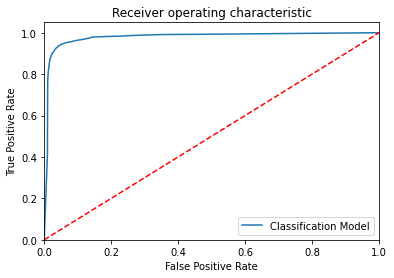

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier(max_depth=25, n_estimators=1200, random_state=42)
Confusion matrix : 
 [[7670  374]
 [ 127 7479]]
Outcome values : 
 7670 374 127 7479
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.95      0.97      8044
           0       0.95      0.98      0.97      7606

    accuracy                           0.97     15650
   macro avg       0.97      0.97      0.97     15650
weighted avg       0.97      0.97      0.97     15650

Accuracy : 96.8 %
Precision : 98.4 %
Recall : 95.4 %
F1 Score : 0.968
Specificity or True Negative Rate : 98.3 %
Balanced Accuracy : 96.8 %
MCC : 0.936
roc_auc_score: 0.968


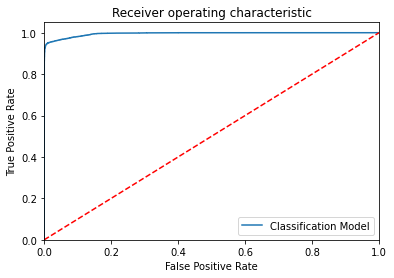

-----------------------------------------------------------------------------------------------------
Model Name:  LogisticRegression()
Confusion matrix : 
 [[7105  939]
 [ 855 6751]]
Outcome values : 
 7105 939 855 6751
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.88      0.89      8044
           0       0.88      0.89      0.88      7606

    accuracy                           0.89     15650
   macro avg       0.89      0.89      0.89     15650
weighted avg       0.89      0.89      0.89     15650

Accuracy : 88.5 %
Precision : 89.3 %
Recall : 88.3 %
F1 Score : 0.888
Specificity or True Negative Rate : 88.8 %
Balanced Accuracy : 88.6 %
MCC : 0.771
roc_auc_score: 0.885


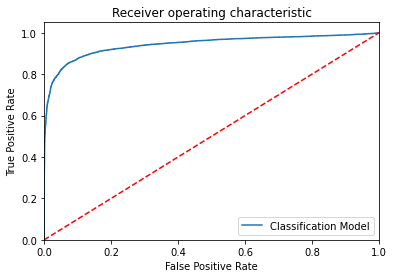

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[7681  363]
 [ 377 7229]]
Outcome values : 
 7681 363 377 7229
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.95      0.95      8044
           0       0.95      0.95      0.95      7606

    accuracy                           0.95     15650
   macro avg       0.95      0.95      0.95     15650
weighted avg       0.95      0.95      0.95     15650

Accuracy : 95.3 %
Precision : 95.3 %
Recall : 95.5 %
F1 Score : 0.954
Specificity or True Negative Rate : 95.0 %
Balanced Accuracy : 95.2 %
MCC : 0.905
roc_auc_score: 0.953


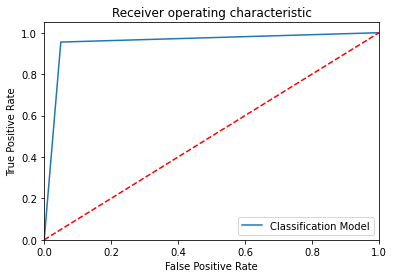

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[7670  374]
 [ 136 7470]]
Outcome values : 
 7670 374 136 7470
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.95      0.97      8044
           0       0.95      0.98      0.97      7606

    accuracy                           0.97     15650
   macro avg       0.97      0.97      0.97     15650
weighted avg       0.97      0.97      0.97     15650

Accuracy : 96.7 %
Precision : 98.3 %
Recall : 95.4 %
F1 Score : 0.968
Specificity or True Negative Rate : 98.2 %
Balanced Accuracy : 96.8 %
MCC : 0.935
roc_auc_score: 0.968


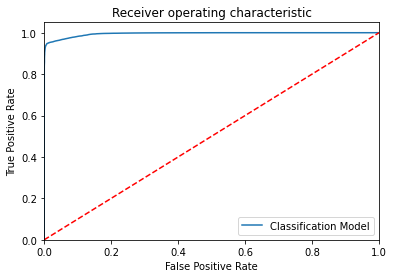

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[7669  375]
 [ 157 7449]]
Outcome values : 
 7669 375 157 7449
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.95      0.97      8044
           0       0.95      0.98      0.97      7606

    accuracy                           0.97     15650
   macro avg       0.97      0.97      0.97     15650
weighted avg       0.97      0.97      0.97     15650

Accuracy : 96.6 %
Precision : 98.0 %
Recall : 95.3 %
F1 Score : 0.966
Specificity or True Negative Rate : 97.9 %
Balanced Accuracy : 96.6 %
MCC : 0.932
roc_auc_score: 0.966


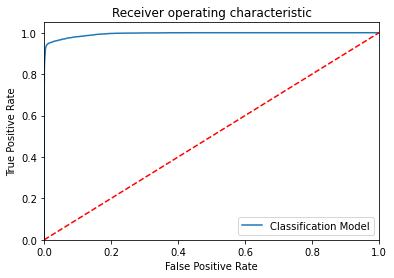

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[7280  764]
 [ 234 7372]]
Outcome values : 
 7280 764 234 7372
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.91      0.94      8044
           0       0.91      0.97      0.94      7606

    accuracy                           0.94     15650
   macro avg       0.94      0.94      0.94     15650
weighted avg       0.94      0.94      0.94     15650

Accuracy : 93.6 %
Precision : 96.9 %
Recall : 90.5 %
F1 Score : 0.936
Specificity or True Negative Rate : 96.9 %
Balanced Accuracy : 93.7 %
MCC : 0.875
roc_auc_score: 0.937


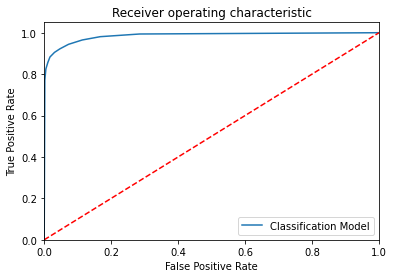

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[6895 1149]
 [ 673 6933]]
Outcome values : 
 6895 1149 673 6933
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.86      0.88      8044
           0       0.86      0.91      0.88      7606

    accuracy                           0.88     15650
   macro avg       0.88      0.88      0.88     15650
weighted avg       0.89      0.88      0.88     15650

Accuracy : 88.4 %
Precision : 91.1 %
Recall : 85.7 %
F1 Score : 0.883
Specificity or True Negative Rate : 91.2 %
Balanced Accuracy : 88.5 %
MCC : 0.769
roc_auc_score: 0.884


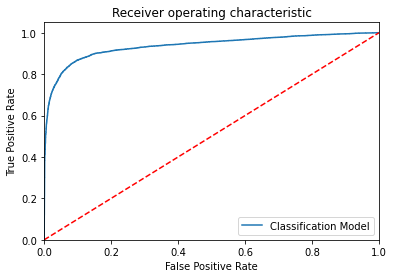

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(gamma='auto', kernel='linear', probability=True, random_state=1)
Confusion matrix : 
 [[7049  995]
 [ 777 6829]]
Outcome values : 
 7049 995 777 6829
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.88      0.89      8044
           0       0.87      0.90      0.89      7606

    accuracy                           0.89     15650
   macro avg       0.89      0.89      0.89     15650
weighted avg       0.89      0.89      0.89     15650

Accuracy : 88.7 %
Precision : 90.1 %
Recall : 87.6 %
F1 Score : 0.888
Specificity or True Negative Rate : 89.8 %
Balanced Accuracy : 88.7 %
MCC : 0.774
roc_auc_score: 0.887


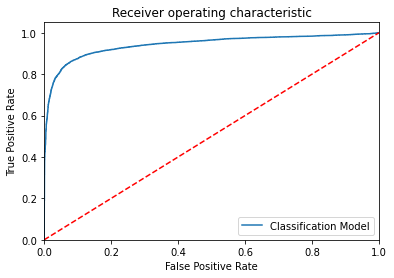

-----------------------------------------------------------------------------------------------------
Model Name:  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=16, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Confusion matrix : 
 [[7699  345]
 [ 161 7445]]
Outcome values : 
 7699 345 161 7445
Classification report : 
               precision    recall  f1-score   support

           1       

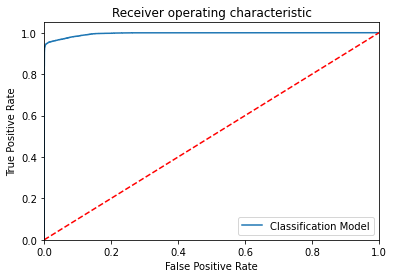

-----------------------------------------------------------------------------------------------------
Model Name:  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Confusion matrix : 
 [[7686  358]
 [ 130 7476]]
Outcome values : 
 7686 358 130 7476
Classification report : 
               precision    recall  f1-score   support

           1       0

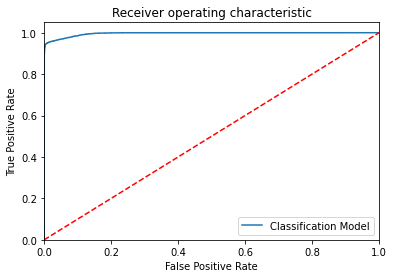

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier(colsample_bytree=0.85, max_depth=15, min_split_gain=0.1,
               n_estimators=200, num_leaves=50, reg_alpha=1.2, reg_lambda=1.2,
               subsample=0.95, subsample_freq=20)
Confusion matrix : 
 [[7665  379]
 [  91 7515]]
Outcome values : 
 7665 379 91 7515
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.95      0.97      8044
           0       0.95      0.99      0.97      7606

    accuracy                           0.97     15650
   macro avg       0.97      0.97      0.97     15650
weighted avg       0.97      0.97      0.97     15650

Accuracy : 97.0 %
Precision : 98.8 %
Recall : 95.3 %
F1 Score : 0.97
Specificity or True Negative Rate : 98.8 %
Balanced Accuracy : 97.0 %
MCC : 0.941
roc_auc_score: 0.97


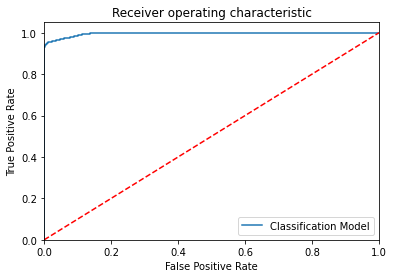

-----------------------------------------------------------------------------------------------------


In [80]:
CSResults=pd.read_csv(r"C:\Users\MAHESH\Downloads\crResults.csv")
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
import lightgbm as lgb

from sklearn.ensemble import BaggingClassifier

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression(**params_lr)
ModelLR2 = LogisticRegression()
ModelDC = DecisionTreeClassifier(**params_dt)
ModelDC2 = DecisionTreeClassifier()
ModelRF = RandomForestClassifier(**params_rf)
ModelRF2 = RandomForestClassifier()
ModelET = ExtraTreesClassifier(n_estimators=100)
ModelKNN = KNeighborsClassifier(n_neighbors=10)
ModelGNB = GaussianNB()
ModelXGB2 = XGBClassifier()
ModelXGB = XGBClassifier(**params_xgb)
ModelSVM = SVC(kernel='linear',random_state=1,gamma = 'auto',probability=True)
ModelLGB = lgb.LGBMClassifier(**params_lgb)

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF,ModelLR2, ModelDC2, ModelRF2, ModelET, ModelKNN, ModelGNB, ModelSVM, ModelXGB, ModelXGB2,ModelLGB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
               'Balanced Accuracy':balanced_accuracy,
              }
    CSResults = CSResults.append(new_row, ignore_index=True)

In [81]:
CSResults

Model Name True_Positive  \
0   LogisticRegression(l1_ratio=0.5, penalty='elas...          7105   
1   DecisionTreeClassifier(max_depth=12, max_featu...          7573   
2   (DecisionTreeClassifier(max_depth=25, max_feat...          7670   
3                                LogisticRegression()          7105   
4                            DecisionTreeClassifier()          7681   
5   (DecisionTreeClassifier(max_features='sqrt', r...          7670   
6   (ExtraTreeClassifier(random_state=804099230), ...          7669   
7                KNeighborsClassifier(n_neighbors=10)          7280   
8                                        GaussianNB()          6895   
9   SVC(gamma='auto', kernel='linear', probability...          7049   
10  XGBClassifier(base_score=0.5, booster='gbtree'...          7699   
11  XGBClassifier(base_score=0.5, booster='gbtree'...          7686   
12  LGBMClassifier(colsample_bytree=0.85, max_dept...          7665   

   False_Negative False_Positive True_Negative  Accuracy  Precision  Recall  \
0             939            855          6751     0.885      0.893   0.883   
1             471            370          7236     0.946      0.953   0.941   
2             374            127          7479     0.968      0.984   0.954   
3             939            855          6751     0.885      0.893   0.883   
4             363            377          7229     0.953      0.953   0.955   
5             374            136          7470     0.967      0.983   0.954   
6             375            157          7449     0.966      0.980   0.953   
7             764            234          7372     0.936      0.969   0.905   
8            1149            673          6933     0.884      0.911   0.857   
9             995            777          6829     0.887      0.901   0.876   
10            345            161          7445     0.968      0.980   0.957   
11            358            130          7476     0.969      0.983   0.955   
12            379             91          7515     0.970      0.988   0.953   

    F1 Score  Specificity    MCC  ROC_AUC_Score  Balanced Accuracy  
0      0.888        0.888  0.771       0.885428              0.886  
1      0.947        0.951  0.893       0.946401              0.946  
2      0.968        0.983  0.936       0.968404              0.968  
3      0.888        0.888  0.771       0.885428              0.886  
4      0.954        0.950  0.905       0.952654              0.952  
5      0.968        0.982  0.935       0.967813              0.968  
6      0.966        0.979  0.932       0.966370              0.966  
7      0.936        0.969  0.875       0.937129              0.937  
8      0.883        0.912  0.769       0.884339              0.885  
9      0.888        0.898  0.774       0.887075              0.887  
10     0.968        0.979  0.936       0.967972              0.968  
11     0.969        0.983  0.938       0.969202              0.969  
12     0.970        0.988  0.941       0.970460              0.970

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
x_test

In [ ]:
y_test

In [ ]:
# To get feature importance

from matplotlib import pyplot

importance = ModelRF.feature_importances_

# Summarize feature importance

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# Plot feature importance

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# PCA

In [ ]:
x_train

In [ ]:
y_train

 Principal component analysis (PCA) is a statistical technique to convert high dimensional data to low dimensional data 
 by selecting the most important features that capture maximum information about the dataset. The features are selected 
 on the basis of variance that they cause in the output. The feature that causes highest variance is the first principal
 component. The feature that is responsible for second highest variance is considered the second principal component, 
 and so on. It is important to mention that principal components do not have any correlation with each other.

In [ ]:


from sklearn.decomposition import PCA

applyPCA = PCA()

x_train = applyPCA.fit_transform(x_train)
x_test = applyPCA.transform(x_test)
explained_variance = applyPCA.explained_variance_ratio_
print(explained_variance)

In [ ]:

df = pd.DataFrame(data=train, columns=train.columns)
df['satisfaction'] = train.satisfaction
df

In [ ]:
x = df.drop(labels='satisfaction', axis=1).values
y = df['satisfaction'].values

In [ ]:
class convers_pca():
    def __init__(self, no_of_components):
        self.no_of_components = no_of_components
        self.eigen_values = None
        self.eigen_vectors = None
        
    def transform(self, x):
        return np.dot(x - self.mean, self.projection_matrix.T)
    
    def inverse_transform(self, x):
        return np.dot(x, self.projection_matrix) + self.mean
    
    def fit(self, x):
        
        if self.no_of_components is None:
            self.no_of_components = x.shape[1]
        else:
            self.no_of_components
        self.mean = np.mean(x, axis=0)
        
        cov_matrix = np.cov(x - self.mean, rowvar=False)
        
        self.eigen_values, self.eigen_vectors = np.linalg.eig(cov_matrix)
        self.eigen_vectors = self.eigen_vectors.T
        
        self.sorted_components = np.argsort(self.eigen_values)[::-1]
        
        self.projection_matrix = self.eigen_vectors[self.sorted_components[:self.no_of_components]]
        self.explained_variance = self.eigen_values[self.sorted_components]
        self.explained_variance_ratio = self.explained_variance / self.eigen_values.sum()

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
transformed = StandardScaler().fit_transform(x)

In [ ]:
pca = convers_pca(no_of_components=2)
pca.fit(transformed)

In [ ]:
pca.eigen_vectors

In [ ]:
pca.eigen_values

In [ ]:
pca.sorted_components

In [ ]:
x_std = pca.transform(transformed)
plt.figure()
plt.scatter(x_std[:, 0], x_std[:, 1], c=y)

Model Name:  LogisticRegression()
Confusion matrix : 
 [[7105  939]
 [ 855 6751]]
Outcome values : 
 7105 939 855 6751
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.88      0.89      8044
           0       0.88      0.89      0.88      7606

    accuracy                           0.89     15650
   macro avg       0.89      0.89      0.89     15650
weighted avg       0.89      0.89      0.89     15650

Accuracy : 88.5 %
Precision : 89.3 %
Recall : 88.3 %
F1 Score : 0.888
Specificity or True Negative Rate : 88.8 %
Balanced Accuracy : 88.6 %
MCC : 0.771
roc_auc_score: 0.885


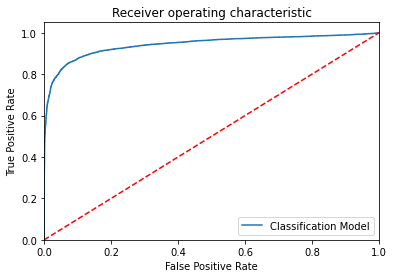

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[7687  357]
 [ 385 7221]]
Outcome values : 
 7687 357 385 7221
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.96      0.95      8044
           0       0.95      0.95      0.95      7606

    accuracy                           0.95     15650
   macro avg       0.95      0.95      0.95     15650
weighted avg       0.95      0.95      0.95     15650

Accuracy : 95.3 %
Precision : 95.2 %
Recall : 95.6 %
F1 Score : 0.954
Specificity or True Negative Rate : 94.9 %
Balanced Accuracy : 95.2 %
MCC : 0.905
roc_auc_score: 0.953


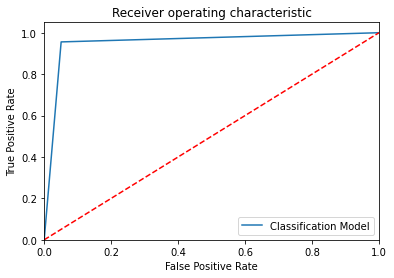

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[7663  381]
 [ 127 7479]]
Outcome values : 
 7663 381 127 7479
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.95      0.97      8044
           0       0.95      0.98      0.97      7606

    accuracy                           0.97     15650
   macro avg       0.97      0.97      0.97     15650
weighted avg       0.97      0.97      0.97     15650

Accuracy : 96.8 %
Precision : 98.4 %
Recall : 95.3 %
F1 Score : 0.968
Specificity or True Negative Rate : 98.3 %
Balanced Accuracy : 96.8 %
MCC : 0.936
roc_auc_score: 0.968


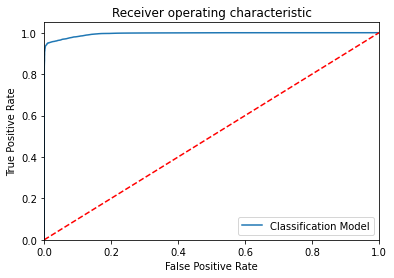

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[7674  370]
 [ 166 7440]]
Outcome values : 
 7674 370 166 7440
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.95      0.97      8044
           0       0.95      0.98      0.97      7606

    accuracy                           0.97     15650
   macro avg       0.97      0.97      0.97     15650
weighted avg       0.97      0.97      0.97     15650

Accuracy : 96.6 %
Precision : 97.9 %
Recall : 95.4 %
F1 Score : 0.966
Specificity or True Negative Rate : 97.8 %
Balanced Accuracy : 96.6 %
MCC : 0.932
roc_auc_score: 0.966


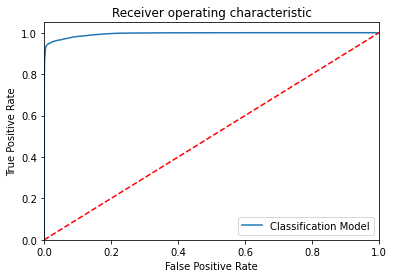

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[7420  624]
 [ 312 7294]]
Outcome values : 
 7420 624 312 7294
Classification report : 
               precision    recall  f1-score   support

           1       0.96      0.92      0.94      8044
           0       0.92      0.96      0.94      7606

    accuracy                           0.94     15650
   macro avg       0.94      0.94      0.94     15650
weighted avg       0.94      0.94      0.94     15650

Accuracy : 94.0 %
Precision : 96.0 %
Recall : 92.2 %
F1 Score : 0.941
Specificity or True Negative Rate : 95.9 %
Balanced Accuracy : 94.0 %
MCC : 0.881
roc_auc_score: 0.941


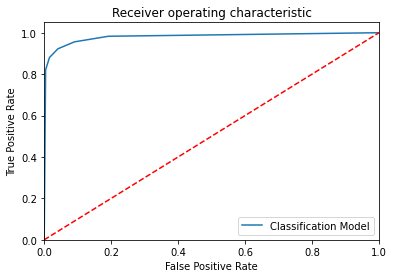

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[6895 1149]
 [ 673 6933]]
Outcome values : 
 6895 1149 673 6933
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.86      0.88      8044
           0       0.86      0.91      0.88      7606

    accuracy                           0.88     15650
   macro avg       0.88      0.88      0.88     15650
weighted avg       0.89      0.88      0.88     15650

Accuracy : 88.4 %
Precision : 91.1 %
Recall : 85.7 %
F1 Score : 0.883
Specificity or True Negative Rate : 91.2 %
Balanced Accuracy : 88.5 %
MCC : 0.769
roc_auc_score: 0.884


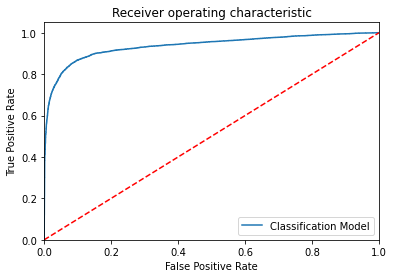

-----------------------------------------------------------------------------------------------------
Model Name:  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Confusion matrix : 
 [[7638  406]
 [ 142 7464]]
Outcome values : 
 7638 406 142 7464
Classification report : 
               precision    recall  f1-score   support



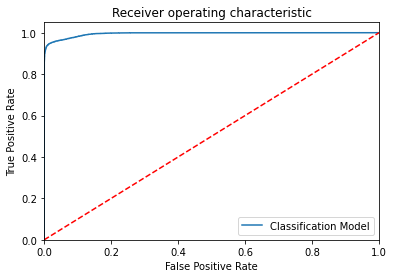

-----------------------------------------------------------------------------------------------------


In [72]:
CSResults=pd.read_csv(r"C:\Users\MAHESH\Downloads\crResults.csv")
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelGNB = GaussianNB()
ModelXGB = XGBClassifier(n_estimators=100, max_depth=3, eval_metric='mlogloss')
ModelLGB = lgb.LGBMClassifier()

# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM, modelXGB, modelLGB]
MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelXGB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    
    

    
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
               'Balanced Accuracy':balanced_accuracy
              }
    CSResults = CSResults.append(new_row, ignore_index=True)

In [73]:
CSResults

Model Name True_Positive  \
0                               LogisticRegression()          7105   
1                           DecisionTreeClassifier()          7687   
2  (DecisionTreeClassifier(max_features='sqrt', r...          7663   
3  (ExtraTreeClassifier(random_state=353719731), ...          7674   
4                             KNeighborsClassifier()          7420   
5                                       GaussianNB()          6895   
6  XGBClassifier(base_score=0.5, booster='gbtree'...          7638   

  False_Negative False_Positive True_Negative  Accuracy  Precision  Recall  \
0            939            855          6751     0.885      0.893   0.883   
1            357            385          7221     0.953      0.952   0.956   
2            381            127          7479     0.968      0.984   0.953   
3            370            166          7440     0.966      0.979   0.954   
4            624            312          7294     0.940      0.960   0.922   
5           1149            673          6933     0.884      0.911   0.857   
6            406            142          7464     0.965      0.982   0.950   

   F1 Score  Specificity    MCC  ROC_AUC_Score  Balanced Accuracy  
0     0.888        0.888  0.771       0.885428              0.886  
1     0.954        0.949  0.905       0.952501              0.952  
2     0.968        0.983  0.936       0.967969              0.968  
3     0.966        0.978  0.932       0.966089              0.966  
4     0.941        0.959  0.881       0.940703              0.940  
5     0.883        0.912  0.769       0.884339              0.885  
6     0.965        0.981  0.931       0.965429              0.966

In [75]:
CSResults.to_csv(r"C:\Users\MAHESH\OneDrive\Desktop\Internship AIML\airlines\results.csv")

# Hyper parameter tuning for random forest

In [ ]:
# Hyperparameter tuning by GridSearchCV

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
GS_grid = {
    'bootstrap': [True, False],
    'max_depth': [10,15],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [3, 4, 5, 6],
    'min_samples_split': [3,4,5,6],
    'n_estimators': [100, 200, 300, 400, 500]
}

# Create object for model

ModelRF2 = RandomForestClassifier()

# Instantiate the grid search model

Grid_search = GridSearchCV(estimator = ModelRF2, param_grid = {'n_estimators': [100, 200, 300, 400, 500]
}, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data

Grid_search.fit(x_train,y_train)

In [ ]:
# Best parameter from gridseachCV

print(Grid_search.best_params_)


In [ ]:
# Display of best parameter

best_grid = Grid_search.best_estimator_
best_grid

# Hyper paarameter for decisison tree

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 

Grid_Params = {'max_depth': [2, 3, 5, 10, 20],
               'min_samples_leaf': [5, 10, 20, 50, 100],
               'criterion': ["gini", "entropy"]
               }

ModelDT = DecisionTreeClassifier(random_state=42)

# Instantiate the grid search model

Grid_search = GridSearchCV(estimator=ModelDT, param_grid=Grid_Params, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data

Grid_search.fit(x_train,y_train)

In [ ]:
# Best parameter from gridseachCV

Grid_search.best_params_

In [ ]:
# Display of best parameter

best_grid = Grid_search.best_estimator_
best_grid

In [ ]:
# To build the 'Decision Tree' model Random sampling - Hyperparameter tuning with RandomizedSearchCV  

from sklearn.tree import DecisionTreeClassifier 

ModelDT = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=560, max_features='log2',
                                 max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                                 min_samples_leaf=6, min_samples_split=5,min_weight_fraction_leaf=0.0,
                                 random_state=None, splitter='best')

# Train the model with train data 

ModelDT.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelDT.predict(x_test)
y_pred_prob = ModelDT.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelDT.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelDT,
           'True_Positive': tp,
           'False_Negative': fn, 
           'False_Positive': fp, 
           'True_Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
HTResults = HTResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

# Hyperparameter tuning by GridSearchCV for Extra Tree

In [ ]:
# Hyperparameter tuning by GridSearchCV

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 

GS_grid = {'bootstrap': [True, False],
           'max_depth': [10,15],
           'max_features': [2, 3],
           'min_samples_leaf': [3, 4, 5,6],
           'min_samples_split': [3,4,5,6],
           'n_estimators': [1150, 1200, 1250, 1300,1350],
           'criterion':['entropy','gini']
           }

# Create object for model

ModelET = ExtraTreesClassifier()

# Instantiate the grid search model

Grid_search = GridSearchCV(estimator = ModelET, param_grid = GS_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data

Grid_search.fit(x_train,y_train)

In [ ]:
# Best parameter from gridseachCV

Grid_search.best_params_

# Feature  Selection

In [102]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(train)
#modified_data = pd.DataFrame(r_scaler.transform(train), index=train['id'], columns=train.columns)
modified_data = pd.DataFrame(r_scaler.transform(train), columns=train.columns)
modified_data.head()

Unnamed: 0        id  Gender  Customer Type       Age  Type of Travel  \
0    0.000000  0.540280     1.0            0.0  0.076923             1.0   
1    0.000010  0.038852     1.0            1.0  0.230769             0.0   
2    0.000019  0.847150     0.0            0.0  0.243590             0.0   
3    0.000029  0.184980     0.0            0.0  0.230769             0.0   
4    0.000038  0.918532     1.0            0.0  0.692308             0.0   

   Class  Flight Distance  Inflight wifi service  \
0    1.0         0.086632                    0.6   
1    0.0         0.041195                    0.6   
2    0.0         0.224354                    0.4   
3    0.0         0.107229                    0.4   
4    0.0         0.036955                    0.6   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                0.8                     0.6            0.2   
1                                0.4                     0.6            0.6   
2                                0.4                     0.4            0.4   
3                                1.0                     1.0            1.0   
4                                0.6                     0.6            0.6   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  \
0             1.0              0.6           1.0                     1.0   
1             0.2              0.6           0.2                     0.2   
2             1.0              1.0           1.0                     1.0   
3             0.4              0.4           0.4                     0.4   
4             0.8              1.0           1.0                     0.6   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0               0.8               0.6              0.75              0.8   
1               0.2               1.0              0.50              0.2   
2               0.8               0.6              0.75              0.8   
3               0.4               1.0              0.50              0.2   
4               0.6               0.8              0.75              0.6   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0               1.0          1.0                    0.015704   
1               0.8          0.2                    0.000628   
2               0.8          1.0                    0.000000   
3               0.8          0.4                    0.006910   
4               0.6          0.6                    0.000000   

   Arrival Delay in Minutes  satisfaction  
0                  0.011364           0.0  
1                  0.003788           0.0  
2                  0.000000           1.0  
3                  0.005682           0.0  
4                  0.000000           1.0

In [103]:
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='satisfaction']
y = modified_data[['satisfaction']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Customer Type', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service'],
      dtype='object')


# Feature Wrapping

In [84]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = train.drop('satisfaction', axis=1)
y = train['satisfaction']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Type of Travel', 'Class', 'Inflight wifi service', 'Online boarding', 'Seat comfort', 'Inflight entertainment']
[0.01675426 0.02879967 0.00398731 0.03178061 0.02775851 0.07749871
 0.10162199 0.03875623 0.13402605 0.01517449 0.03818166 0.01377455
 0.01051877 0.18586955 0.04575846 0.05070058 0.03211072 0.03905721
 0.02356772 0.02270147 0.01767211 0.02421231 0.00914331 0.01057375]


In [85]:
features = ['Customer Type', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service']
target = ['satisfaction']

# Split into test and train
X_train = train[features]
y_train = train[target].to_numpy()
X_test = test[features]
y_test = test[target].to_numpy()

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [66]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
from matplotlib import pyplot as plt 
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    plot_roc_curve(model, X_test, y_test)                     
    
    return model, accuracy, roc_auc, time_taken

Accuracy = 0.9679872204472844
ROC Area under Curve = 0.9684041871730201
Time taken = 50.354904890060425
              precision    recall  f1-score   support

           0    0.95237   0.98330   0.96759      7606
           1    0.98371   0.95351   0.96837      8044

    accuracy                        0.96799     15650
   macro avg    0.96804   0.96840   0.96798     15650
weighted avg    0.96848   0.96799   0.96799     15650



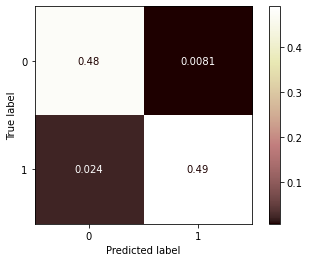

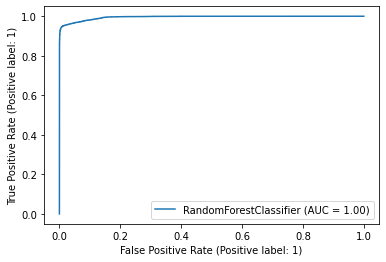

In [131]:
from sklearn.ensemble import RandomForestClassifier


model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(model_rf, x_train, y_train, x_test, y_test)

Accuracy = 0.9666453674121406
ROC Area under Curve = 0.9670308569760873
Time taken = 3.4789493083953857
              precision    recall  f1-score   support

           0    0.95202   0.98080   0.96620      7606
           1    0.98132   0.95326   0.96708      8044

    accuracy                        0.96665     15650
   macro avg    0.96667   0.96703   0.96664     15650
weighted avg    0.96708   0.96665   0.96665     15650



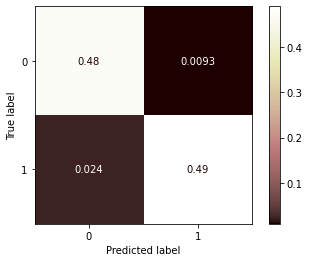

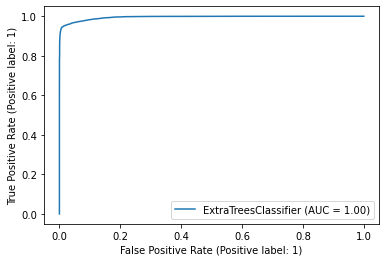

In [128]:

from sklearn.ensemble import ExtraTreesClassifier
ModelET = ExtraTreesClassifier()
ModelET, accuracy_et, roc_auc_et, tt_et = run_model(ModelET, x_train, y_train, x_test, y_test)

Accuracy = 0.966517571884984
ROC Area under Curve = 0.9668707462623726
Time taken = 4.033803701400757
              precision    recall  f1-score   support

           0    0.95293   0.97949   0.96603      7606
           1    0.98008   0.95425   0.96699      8044

    accuracy                        0.96652     15650
   macro avg    0.96651   0.96687   0.96651     15650
weighted avg    0.96689   0.96652   0.96652     15650



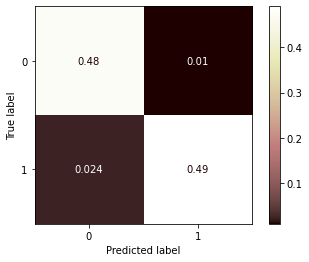

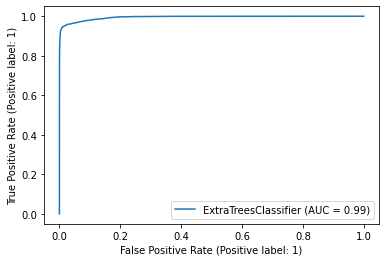

In [69]:

from sklearn.ensemble import ExtraTreesClassifier
ModelET = ExtraTreesClassifier()
ModelET, accuracy_et, roc_auc_et, tt_et = run_model(ModelET, x_train, y_train, x_test, y_test)

Accuracy = 0.9688178913738019
ROC Area under Curve = 0.9692015045307606
Time taken = 1.8975417613983154
              precision    recall  f1-score   support

           0    0.95430   0.98291   0.96839      7606
           1    0.98337   0.95549   0.96923      8044

    accuracy                        0.96882     15650
   macro avg    0.96883   0.96920   0.96881     15650
weighted avg    0.96924   0.96882   0.96882     15650



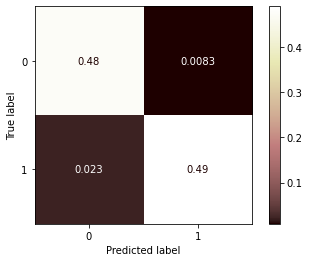

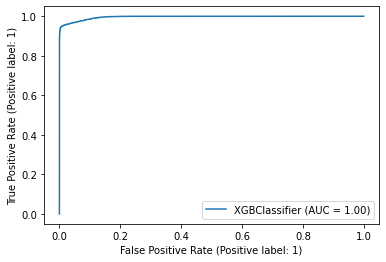

In [70]:

from xgboost import XGBClassifier
ModelXGB = XGBClassifier()
ModelXGB, accuracy_XGB, roc_auc_XGB, tt_XGB = run_model(ModelXGB, x_train, y_train, x_test, y_test)